# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
import warnings

# Data Cleaning

In [2]:
# Import first sheet
df1 = pd.read_excel('D:\\DataSet\\testa.xlsx', sheet_name = 0)
df1

,Market,TD Agent,Customer Name,Customer ID,Vertical,Customer Loyalty,Customer Tier,Opportunity Stage,Pitched to Customer,Purchased,Actual Revenue,Goal,Total Calls,Num of Successful Calls,Num of Pitch Calls,Num of Follow-up Calls,Call Duration (mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,NaN,NaN,NaN,NaN,NaN
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,NaN,NaN,NaN,NaN,NaN
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,NaN,NEW,C,New,No,No,4996.8,3786.2,NaN,NaN,NaN,NaN,NaN
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Normalize column names
df1.columns = [i.lower().replace(' ','_') for i in df1.columns]
df1.columns

Index(['market', 'td_agent', 'customer_name', 'customer_id', 'vertical',
       'customer_loyalty', 'customer_tier', 'opportunity_stage',
       'pitched_to_customer', 'purchased', 'actual_revenue', 'goal',
       'total_calls', 'num_of_successful_calls', 'num_of_pitch_calls',
       'num_of_follow-up_calls', 'call_duration_(mins)'],
      dtype='object')

In [4]:
# Check missing values
df1.isnull().sum()

market                        0
td_agent                      0
customer_name                 0
customer_id                   0
vertical                   1608
customer_loyalty              0
customer_tier                 0
opportunity_stage             2
pitched_to_customer           0
purchased                     0
actual_revenue                0
goal                          0
total_calls                2249
num_of_successful_calls    2877
num_of_pitch_calls         3236
num_of_follow-up_calls     3926
call_duration_(mins)       2249
dtype: int64

In [5]:
# Impute missing values in numerical columns
features = ['total_calls', 'num_of_successful_calls', 'num_of_pitch_calls','num_of_follow-up_calls', 'call_duration_(mins)']
for i in features:
    df1[i].fillna(0 , inplace = True)

In [6]:
# Impute missing values in categorical columns
df1['vertical'].fillna(df1['vertical'].mode()[0] , inplace = True)
df1['opportunity_stage'].fillna(df1['opportunity_stage'].mode()[0] , inplace = True)

In [7]:
# Check data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   market                   4933 non-null   object 
 1   td_agent                 4933 non-null   object 
 2   customer_name            4933 non-null   object 
 3   customer_id              4933 non-null   object 
 4   vertical                 4933 non-null   object 
 5   customer_loyalty         4933 non-null   object 
 6   customer_tier            4933 non-null   object 
 7   opportunity_stage        4933 non-null   object 
 8   pitched_to_customer      4933 non-null   object 
 9   purchased                4933 non-null   object 
 10  actual_revenue           4933 non-null   float64
 11  goal                     4933 non-null   float64
 12  total_calls              4933 non-null   float64
 13  num_of_successful_calls  4933 non-null   float64
 14  num_of_pitch_calls      

In [8]:
# Check data accuracy
for i in df1.columns:
    print('Name of column : {}'.format(i))
    print('Unique Value')
    print(df1[i].unique())
    print(df1[i].nunique())
    print('-----------------------------')

Name of column : market
Unique Value
['Ctry 1' 'Ctry 2' 'Ctry 3' 'Ctry 4' 'Ctry 5' 'Ctry 6' 'Ctry 7']
7
-----------------------------
Name of column : td_agent
Unique Value
['Agent 05' 'Agent 17' 'Agent 10' 'Agent 15' 'Agent 21' 'Agent 24'
 'Agent 16' 'Agent 20' 'Agent 22' 'Agent 01' 'Agent 03' 'Agent 04'
 'Agent 07' 'Agent 13' 'Agent 23' 'Agent 27' 'Agent 09' 'Agent 11'
 'Agent 12' 'Agent 08' 'Agent 29' 'Agent 30' 'Agent 25' 'Agent 26'
 'Agent 28']
25
-----------------------------
Name of column : customer_name
Unique Value
['Advertiser 0001' 'Advertiser 0002' 'Advertiser 0003' ...
 'Advertiser 4931' 'Advertiser 4932' 'Advertiser 4933']
4933
-----------------------------
Name of column : customer_id
Unique Value
['0011200001Gu8I5AAJ' '001A000000wJ2WHIA0' '0011200001DQtHpAAL' ...
 '0011200001I1nsgAAB' '0011200001DRfmLAAT' '0011200001FIClWAAX']
4933
-----------------------------
Name of column : vertical
Unique Value
['Vertical 09' 'Vertical 07' 'Vertical 03' 'Vertical 08' 'Vertical 15'

In [9]:
df1

,market,td_agent,customer_name,customer_id,vertical,customer_loyalty,customer_tier,opportunity_stage,pitched_to_customer,purchased,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,0.0,0.0,0.0,0.0,0.00
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,0.0,0.0,0.0,0.0,0.00
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,Vertical 04,NEW,C,New,No,No,4996.8,3786.2,0.0,0.0,0.0,0.0,0.00
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,0.0,0.0,0.0,0.0,0.00


In [10]:
# Inspect descriptive statistics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
actual_revenue,4933.0,9799.973323,26301.054428,0.0,1500.0,3940.8,8962.8,848835.6
goal,4933.0,12445.250375,23926.372405,0.0,3303.3,5960.9,12425.6,605838.2
total_calls,4933.0,2.006284,3.170947,0.0,0.0,1.0,3.0,35.0
num_of_successful_calls,4933.0,1.126495,2.099659,0.0,0.0,0.0,1.0,31.0
num_of_pitch_calls,4933.0,0.752078,1.534795,0.0,0.0,0.0,1.0,21.0
num_of_follow-up_calls,4933.0,0.426110,1.169385,0.0,0.0,0.0,0.0,16.0
call_duration_(mins),4933.0,28.328887,61.638037,0.0,0.0,0.0,30.0,1070.0


# Exploring numerical and categorical features

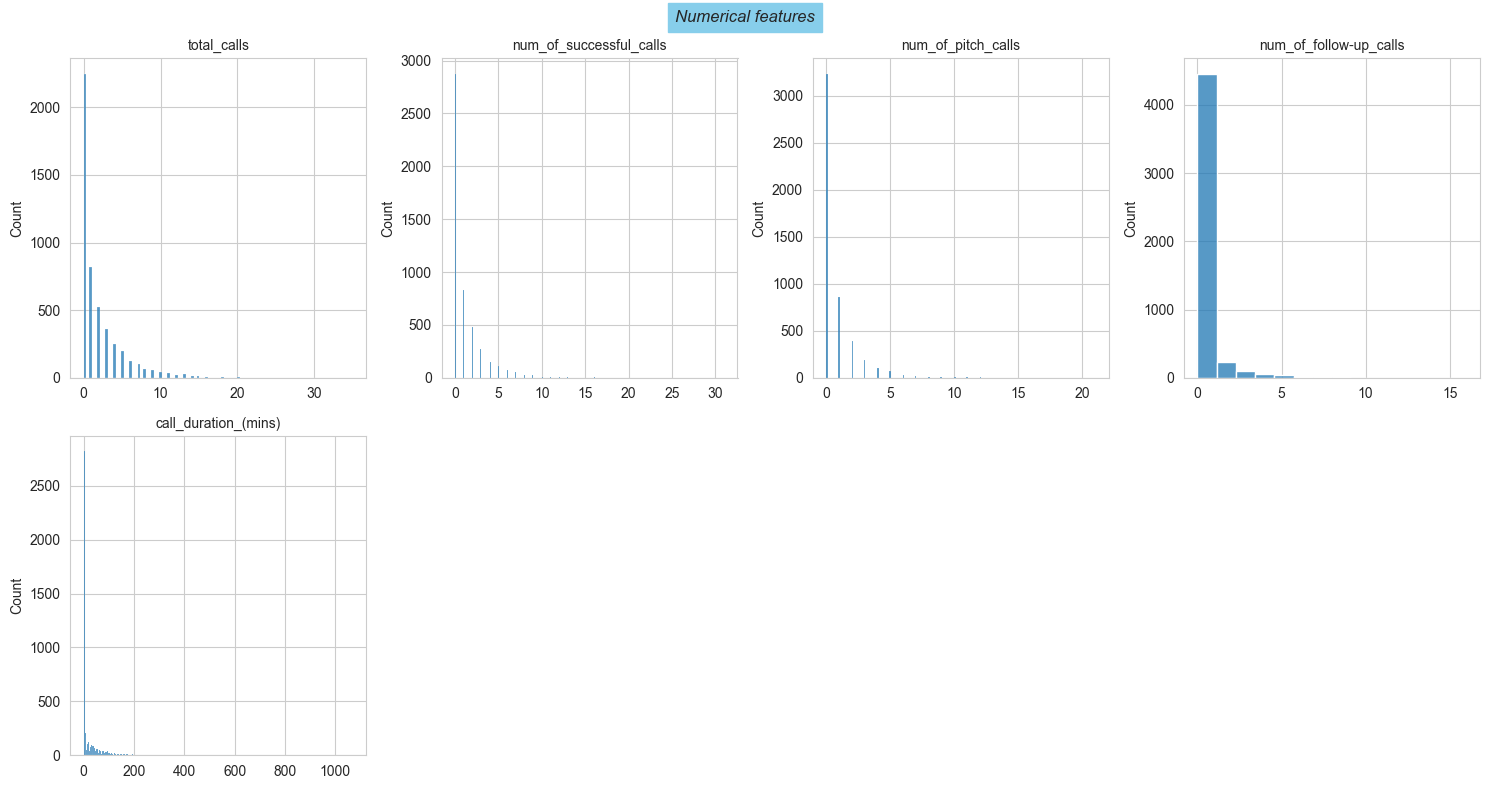

In [11]:
# Exploring Numerical features
fig = plt.figure(figsize = (15,8))
plt.suptitle('Numerical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')

for i,j in enumerate(features):
    ax = fig.add_subplot(2,4,i+1)
    ax = sns.histplot(df1 , x = j)
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Arial')
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    
plt.tight_layout()    

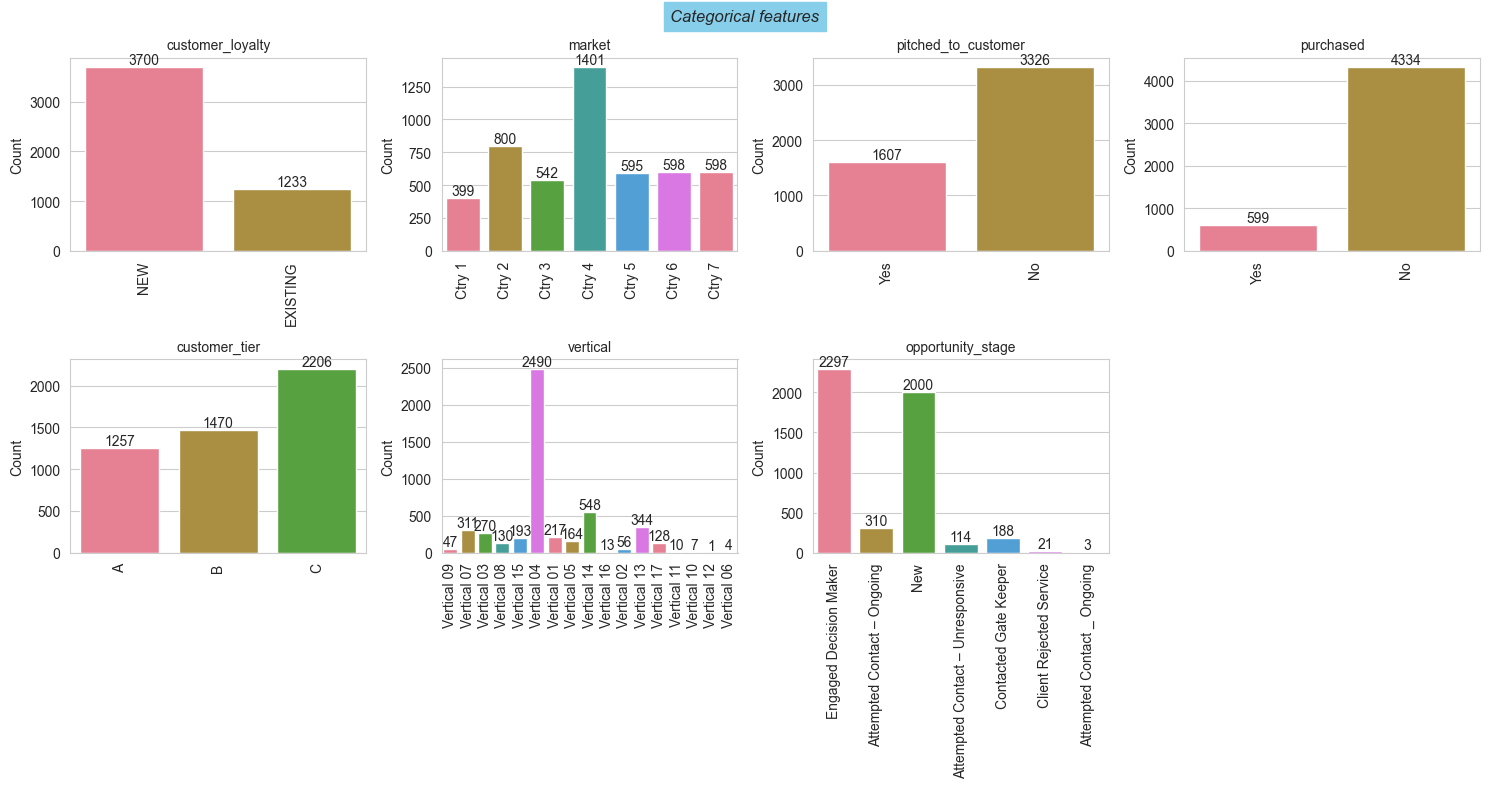

In [12]:
# Exploring some categorical features
features = ['customer_loyalty','market','pitched_to_customer','purchased','customer_tier','vertical','opportunity_stage']
fig = plt.figure(figsize = (15,8))
plt.suptitle('Categorical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')

for i,j in enumerate(features):
    ax = fig.add_subplot(2,4,i+1)
    ax = sns.countplot(df1 , x = j, palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Arial')
    ax.set_xticklabels(labels = df1[j].unique(),rotation = 90)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.bar_label(ax.containers[0],label_type='edge')
plt.tight_layout()    

[Text(0, 0, '138'), Text(0, 0, '2068')]

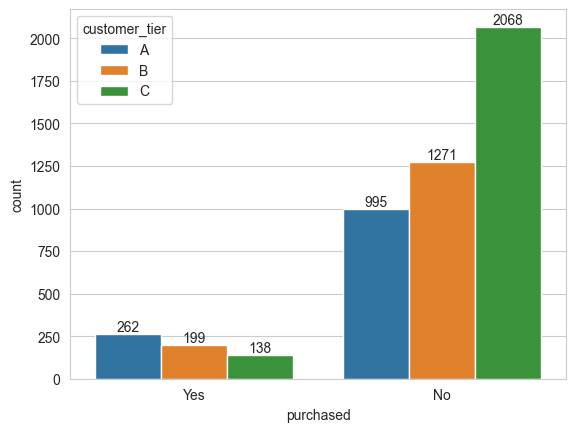

In [13]:
ax = sns.countplot(df1 , x = 'purchased' , hue = 'customer_tier')
ax.bar_label(ax.containers[0],label_type='edge')
ax.bar_label(ax.containers[1],label_type='edge')
ax.bar_label(ax.containers[2],label_type='edge')

In [14]:
df1

,market,td_agent,customer_name,customer_id,vertical,customer_loyalty,customer_tier,opportunity_stage,pitched_to_customer,purchased,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,0.0,0.0,0.0,0.0,0.00
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,0.0,0.0,0.0,0.0,0.00
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,Vertical 04,NEW,C,New,No,No,4996.8,3786.2,0.0,0.0,0.0,0.0,0.00
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,0.0,0.0,0.0,0.0,0.00


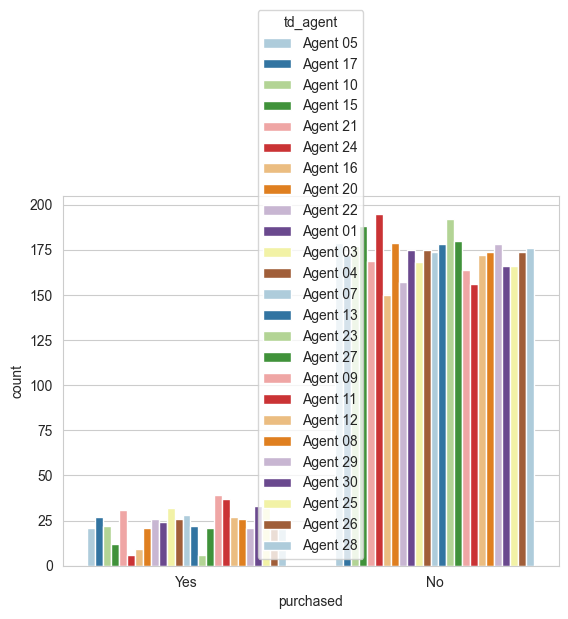

In [15]:
ax = sns.countplot(df1 , x = 'purchased' , hue = 'td_agent' , palette ="Paired" )

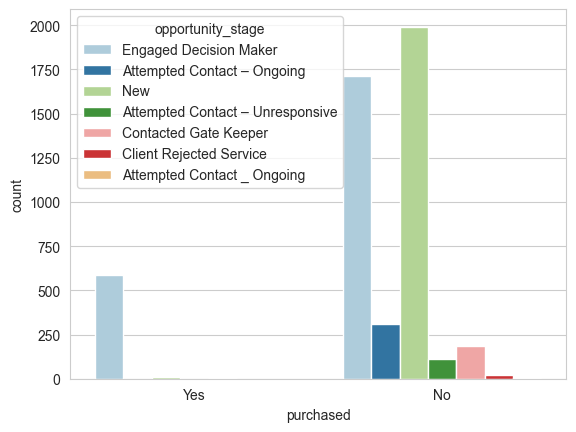

In [16]:
ax = sns.countplot(df1 , x = 'purchased' , hue = 'opportunity_stage' , palette ="Paired" )

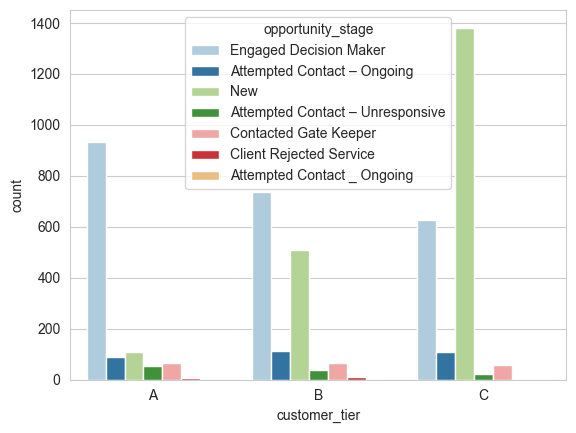

In [17]:
ax = sns.countplot(df1 , x = 'customer_tier' , hue = 'opportunity_stage' , palette ="Paired" )

In [18]:
df1

,market,td_agent,customer_name,customer_id,vertical,customer_loyalty,customer_tier,opportunity_stage,pitched_to_customer,purchased,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,0.0,0.0,0.0,0.0,0.00
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,0.0,0.0,0.0,0.0,0.00
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,Vertical 04,NEW,C,New,No,No,4996.8,3786.2,0.0,0.0,0.0,0.0,0.00
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,0.0,0.0,0.0,0.0,0.00


In [19]:
#Purchased
dfp = df1.copy()
dfp = pd.get_dummies(dfp, columns = ['purchased'] , drop_first = True)
dfp.groupby('market',as_index = False).sum().sort_values('actual_revenue',ascending = False)

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\3265848867.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfp.groupby('market',as_index = False).sum().sort_values('actual_revenue',ascending = False)


,market,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins),purchased_Yes
2,Ctry 3,8426780.4,11020106.9,863.0,514.0,353.0,135.0,12595.00,56
3,Ctry 4,8051332.8,9496957.8,2528.0,1523.0,931.0,553.0,44396.50,159
1,Ctry 2,7938594.0,11087663.4,1903.0,737.0,466.0,229.0,14338.62,71
5,Ctry 6,7867627.2,8803438.6,1232.0,831.0,573.0,297.0,21284.00,80
0,Ctry 1,5656356.0,6556562.1,610.0,447.0,308.0,204.0,14075.00,48
6,Ctry 7,5501114.4,8690724.9,1307.0,694.0,505.0,512.0,11922.28,82
4,Ctry 5,4901463.6,5736966.4,1454.0,811.0,574.0,172.0,21135.00,103


In [20]:
dfp.groupby('vertical',as_index = False).sum().sort_values('actual_revenue',ascending = False)

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\1380743739.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfp.groupby('vertical',as_index = False).sum().sort_values('actual_revenue',ascending = False)


,vertical,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins),purchased_Yes
3,Vertical 04,16435388.4,19228475.2,4198.0,2333.0,1570.0,763.0,61525.43,260
6,Vertical 07,4985889.6,6487815.4,749.0,431.0,274.0,151.0,9977.67,42
13,Vertical 14,4957957.2,6209834.4,1150.0,635.0,430.0,304.0,15246.04,72
0,Vertical 01,4655161.2,6356820.8,537.0,349.0,237.0,128.0,7920.65,29
12,Vertical 13,4631120.4,5762309.3,726.0,406.0,262.0,155.0,9553.77,39
2,Vertical 03,4271215.2,4929480.6,824.0,484.0,333.0,232.0,13036.01,57
14,Vertical 15,2469036.0,3633078.9,421.0,234.0,141.0,83.0,5050.68,30
4,Vertical 05,1495406.4,2316620.9,392.0,208.0,129.0,83.0,5609.63,19
7,Vertical 08,1437043.2,2086443.7,412.0,200.0,142.0,83.0,5376.44,16
16,Vertical 17,1227031.2,1570312.7,256.0,137.0,96.0,62.0,3350.54,15


In [21]:
df1[df1['vertical'] == 'Vertical 04'].groupby('customer_name',as_index = False).sum()

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\3785358527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1[df1['vertical'] == 'Vertical 04'].groupby('customer_name',as_index = False).sum()


,customer_name,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Advertiser 0006,126990.0,81501.2,6.0,3.0,2.0,2.0,124.0
1,Advertiser 0009,27906.0,52481.0,0.0,0.0,0.0,0.0,0.0
2,Advertiser 0010,42889.2,45865.6,3.0,1.0,1.0,1.0,78.0
3,Advertiser 0017,30766.8,27838.8,3.0,2.0,1.0,0.0,54.0
4,Advertiser 0018,15961.2,27803.6,7.0,1.0,1.0,0.0,111.0
...,...,...,...,...,...,...,...,...
2485,Advertiser 4923,2750.4,4064.5,2.0,2.0,2.0,0.0,52.0
2486,Advertiser 4927,552.0,3825.8,0.0,0.0,0.0,0.0,0.0
2487,Advertiser 4928,0.0,3983.1,0.0,0.0,0.0,0.0,0.0
2488,Advertiser 4930,1556.4,3286.8,0.0,0.0,0.0,0.0,0.0


# Calculation Metrics

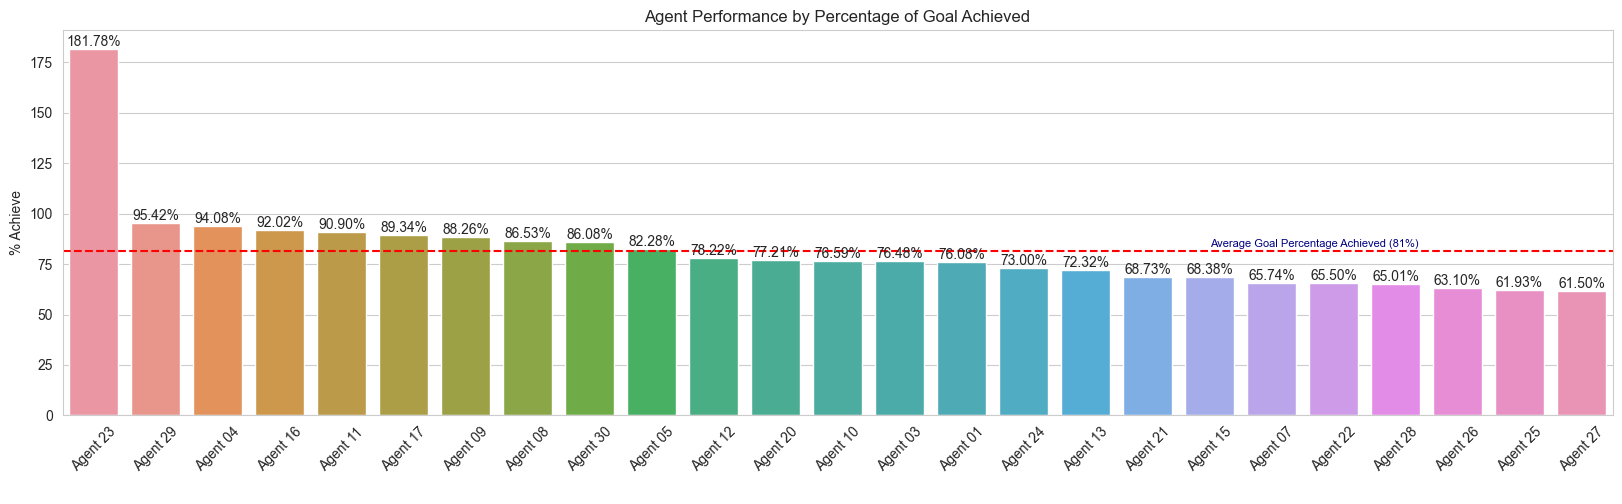

In [22]:
dfx = df1[['td_agent','actual_revenue','goal']].groupby('td_agent', as_index = False).sum().sort_values('actual_revenue' , ascending = False)
dfx['pct_achieve'] = dfx['actual_revenue'] / dfx['goal'] * 100
dfx.sort_values('pct_achieve' , ascending = False)

fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfx.sort_values('pct_achieve' , ascending = False) , x = 'td_agent' , y= 'pct_achieve')
ax.set_ylabel('% Achieve')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Goal Achieved')
plt.axhline(y  = np.mean(dfx['pct_achieve']) ,color="red", linestyle="--")
plt.text(x =  18 ,y = np.mean(dfx['pct_achieve'])+2,s = 'Average Goal Percentage Achieved ({}%)'.format(int(np.mean(dfx['pct_achieve']))) , fontdict = {'size' : 8 , 'color' : 'navy'})
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.xticks(rotation=45);

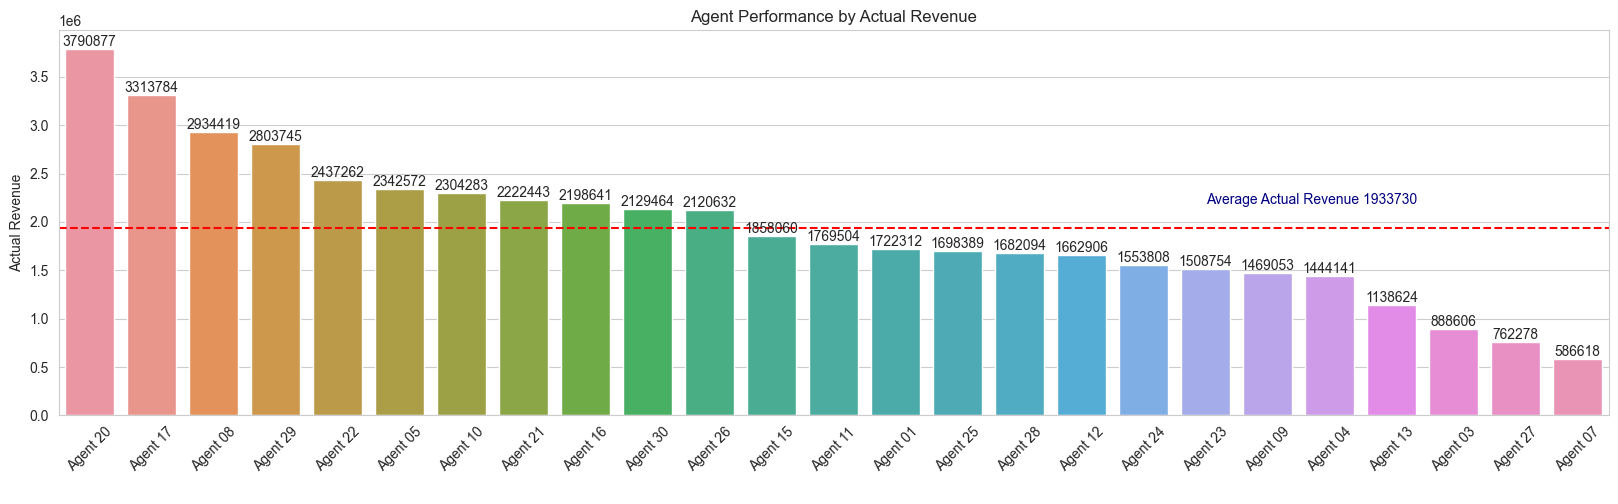

In [23]:
fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfx.sort_values('actual_revenue' , ascending = False) , x = 'td_agent' , y= 'actual_revenue')
ax.set_ylabel('Actual Revenue')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Actual Revenue')
plt.axhline(y  = np.mean(dfx['actual_revenue']) ,color="red", linestyle="--")
plt.text(x =  18 ,y = np.mean(dfx['actual_revenue']) + 250000,s = 'Average Actual Revenue {}'.format(int(np.mean(dfx['actual_revenue']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.f')
plt.xticks(rotation=45);
plt.savefig('revenue', format= 'png')

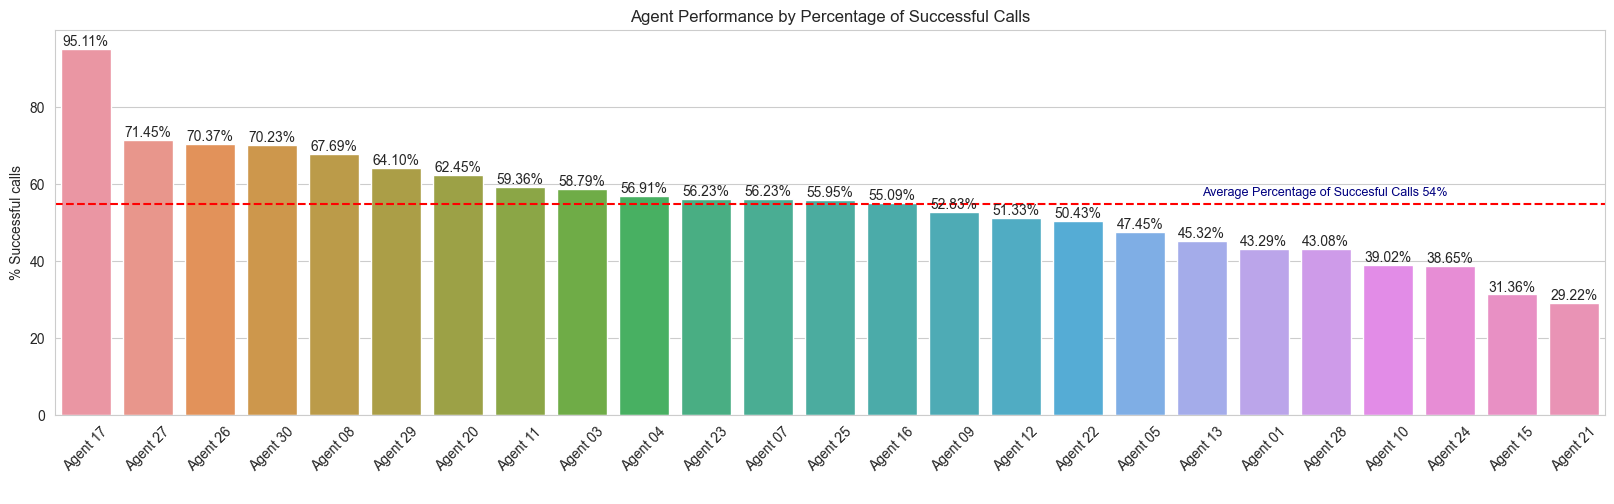

In [150]:
dfs = df1.copy()
dfs['pct_successful_calls'] = dfs['num_of_successful_calls'] / dfs['total_calls'] * 100
dfs = dfs[dfs['customer_loyalty'] == 'NEW'].groupby('td_agent',as_index = False).mean('pct_successful_calls').sort_values('pct_successful_calls',ascending = False)

fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfs.sort_values('pct_successful_calls' , ascending = False) , x = 'td_agent' , y= 'pct_successful_calls')
ax.set_ylabel('% Successful calls')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Successful Calls')
plt.axhline(y  = np.mean(dfs['pct_successful_calls']) ,color="red", linestyle="--" )
plt.text(x = 18 , y = np.mean(dfs['pct_successful_calls']) + 2 ,s = 'Average Percentage of Succesful Calls {}%'.format(int(np.mean(dfs['pct_successful_calls']))),
         fontdict = {'size' : 9 , 'color' : 'navy'})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%');

In [149]:
df1

,market,td_agent,customer_name,customer_id,vertical,customer_loyalty,customer_tier,opportunity_stage,pitched_to_customer,purchased,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,0.0,0.0,0.0,0.0,0.00
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,0.0,0.0,0.0,0.0,0.00
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,Vertical 04,NEW,C,New,No,No,4996.8,3786.2,0.0,0.0,0.0,0.0,0.00
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,0.0,0.0,0.0,0.0,0.00


In [25]:
dfq = df1.copy()
dfq['pct_successful_calls'] = dfq['num_of_successful_calls'] / dfq['total_calls'] * 100
dfq = dfq.groupby('customer_name',as_index = False).mean('pct_successful_calls').sort_values('pct_successful_calls',ascending = True)
dfq[dfq['pct_successful_calls'] < 50]

,customer_name,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins),pct_successful_calls
2410,Advertiser 2411,510.0,3824.7,1.0,0.0,0.0,0.0,5.00,0.000000
3169,Advertiser 3170,5328.0,11561.0,3.0,0.0,0.0,0.0,0.00,0.000000
3168,Advertiser 3169,29062.8,15185.5,2.0,0.0,0.0,0.0,0.00,0.000000
1007,Advertiser 1008,65764.8,28668.2,2.0,0.0,0.0,0.0,8.00,0.000000
3164,Advertiser 3165,8244.0,12228.7,3.0,0.0,0.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...
684,Advertiser 0685,5598.0,6723.2,13.0,6.0,2.0,4.0,161.00,46.153846
642,Advertiser 0643,0.0,14457.3,13.0,6.0,4.0,3.0,67.00,46.153846
4932,Advertiser 4933,0.0,0.0,28.0,13.0,12.0,13.0,95.87,46.428571
3745,Advertiser 3746,30475.2,55828.3,15.0,7.0,7.0,6.0,260.00,46.666667


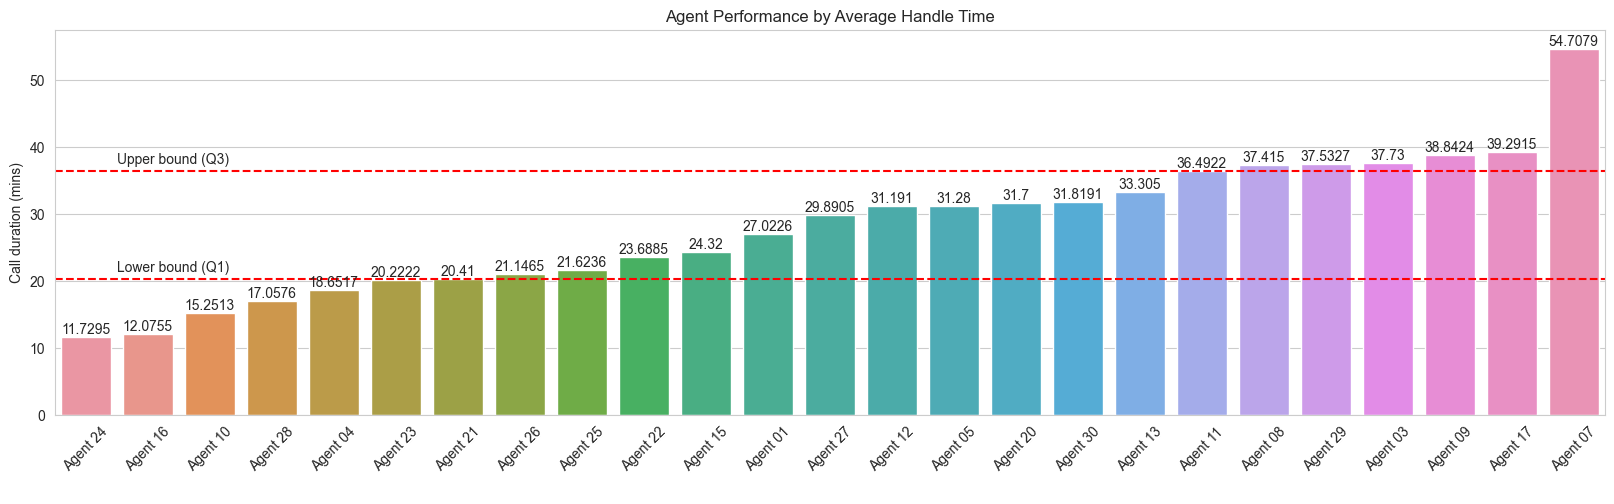

In [26]:
########
dfa = df1.groupby('td_agent',as_index = False)['call_duration_(mins)'].mean()
fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfa.sort_values('call_duration_(mins)' , ascending = True) , x = 'td_agent' , y= 'call_duration_(mins)')
ax.set_ylabel('Call duration (mins)')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Average Handle Time')
plt.xticks(rotation=45)
## Calculate q1 and q3 to draw treshold
sorted_data = sorted(dfa['call_duration_(mins)'])
q1, q3 = np.percentile((sorted_data) , [25,75])
plt.axhline(y  = q1 ,color="red", linestyle="--")
plt.axhline(y  = q3 ,color="red", linestyle="--")
####
plt.text(x = 0.5, y = q3+1, s = 'Upper bound (Q3)')
plt.text(x = 0.5, y = q1+1, s = 'Lower bound (Q1)')
ax.bar_label(ax.containers[0],label_type='edge');

In [27]:
lower = ['Agent 24','Agent 16','Agent 10','Agent 28','Agent 04','Agent 21']
upper = ['Agent 08','Agent 29','Agent 03','Agent 09','Agent 17','Agent 07']
between = lower + upper

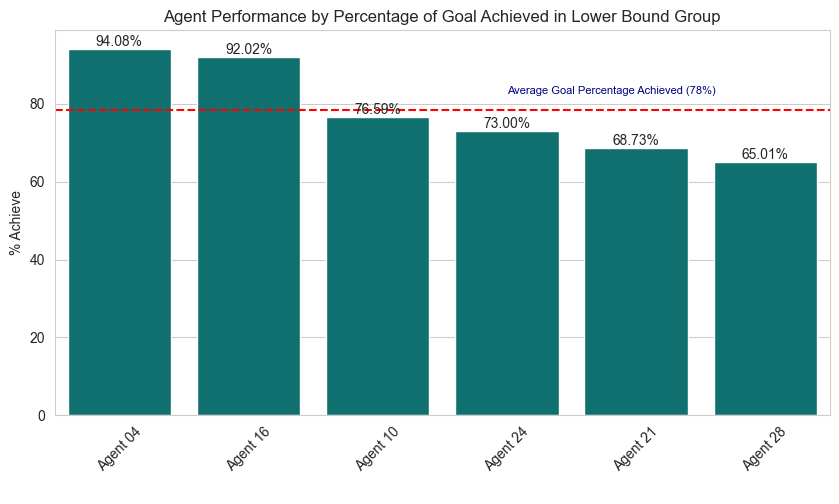

In [89]:
lower_group = dfx[dfx['td_agent'].isin(lower)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(lower_group.sort_values('pct_achieve' , ascending = False) , x = 'td_agent' , y= 'pct_achieve' , color = 'teal')
ax.set_ylabel('% Achieve')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Goal Achieved in Lower Bound Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(lower_group['pct_achieve']) ,color="red", linestyle="--")
plt.text(x = 3 , y = np.mean(dfx['pct_achieve'])+1 ,s = 'Average Goal Percentage Achieved ({}%)'.format(int(np.mean(lower_group['pct_achieve']))) , fontdict = {'size' : 8 , 'color' : 'navy'})
plt.xticks(rotation=45);

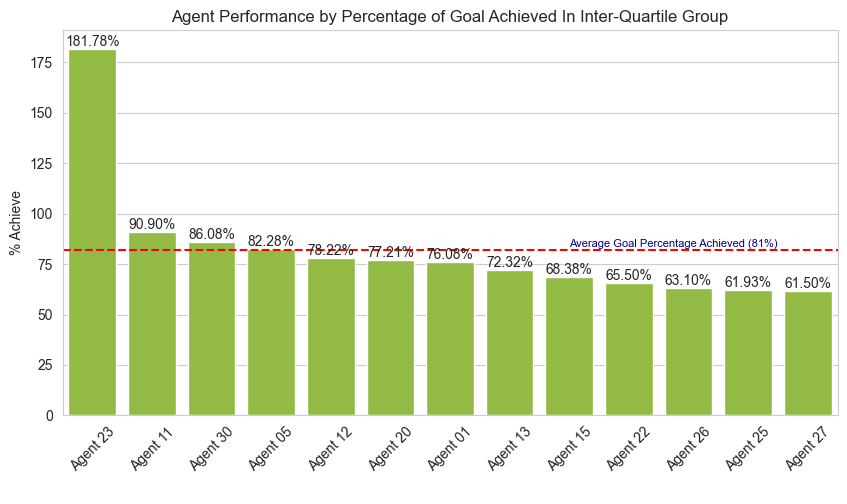

In [90]:
IQR_group = dfx[~dfx['td_agent'].isin(between)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(IQR_group.sort_values('pct_achieve' , ascending = False) , x = 'td_agent' , y= 'pct_achieve' , color = 'yellowgreen')
ax.set_ylabel('% Achieve')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Goal Achieved In Inter-Quartile Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(IQR_group['pct_achieve']) ,color="red", linestyle="--")
plt.text(x = 8 , y = np.mean(dfx['pct_achieve'])+2 , s = 'Average Goal Percentage Achieved ({}%)'.format(int(np.mean(IQR_group['pct_achieve']))) , fontdict = {'size' : 8 , 'color' : 'navy'})
plt.xticks(rotation=45);

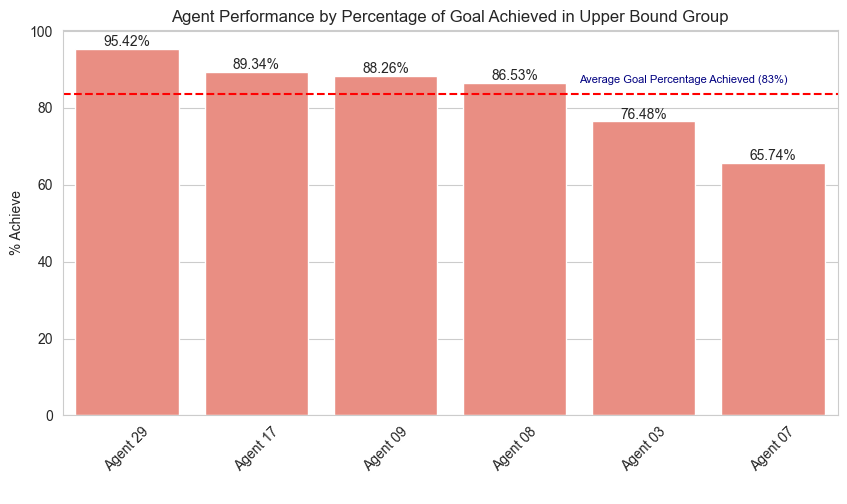

In [92]:
upper_group = dfx[dfx['td_agent'].isin(upper)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(upper_group.sort_values('pct_achieve' , ascending = False) , x = 'td_agent' , y= 'pct_achieve' , color = 'salmon')
ax.set_ylabel('% Achieve')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Goal Achieved in Upper Bound Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(upper_group['pct_achieve']) ,color="red", linestyle="--")
plt.text(x = 3.5 , y = np.mean(dfx['pct_achieve'])+5 , s = 'Average Goal Percentage Achieved ({}%)'.format(int(np.mean(upper_group['pct_achieve']))) , fontdict = {'size' : 8 , 'color' : 'navy'})
plt.xticks(rotation=45);

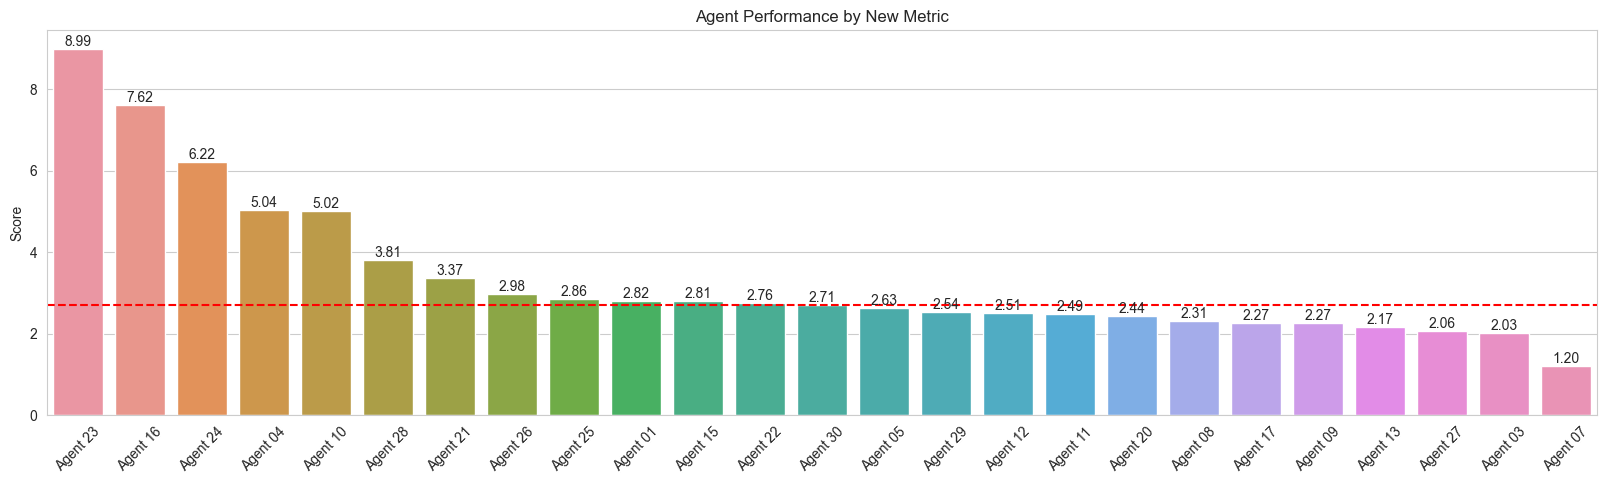

In [31]:
# Calculate the table of new metric
new_metric = df1[['td_agent','actual_revenue','goal']].groupby('td_agent', as_index = False).sum().sort_values('actual_revenue' , ascending = False)
new_metric['pct_achieve'] = new_metric['actual_revenue'] / new_metric['goal'] * 100
# merge new_metric with AHD table (dfa)
new_metric = new_metric.merge(dfa , how = 'left', on = 'td_agent')
# Calculate score
new_metric['new_score'] = new_metric['pct_achieve'] / new_metric['call_duration_(mins)']
new_metric.sort_values('new_score', ascending = False)
#Plot
fig = plt.figure(figsize= (20,5))
ax = sns.barplot(new_metric.sort_values('new_score' , ascending = False) , x = 'td_agent' , y= 'new_score')
ax.set_ylabel('Score')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by New Metric')
plt.axhline(y  = np.median(new_metric['new_score']) ,color="red", linestyle="--")
# plt.text(x =  18 ,y = np.mean(dfx['pct_achieve'])+2,s = 'Average Goal Percentage Achieved ({}%)'.format(int(np.mean(dfx['pct_achieve']))) , fontdict = {'size' : 8 , 'color' : 'navy'})
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f')
plt.xticks(rotation=45);

In [32]:
below_avg = ['Agent 30','Agent 05','Agent 29','Agent 12','Agent 11','Agent 20','Agent 08','Agent 17','Agent 09','Agent 13','Agent 27','Agent 03','Agent 07']
new_metric[new_metric['td_agent'].isin(below_avg)]

,td_agent,actual_revenue,goal,pct_achieve,call_duration_(mins),new_score
0,Agent 20,3790876.8,4909598.1,77.213587,31.700000,2.435760
1,Agent 17,3313784.4,3709376.0,89.335360,39.291457,2.273659
2,Agent 08,2934418.8,3391326.4,86.527171,37.415000,2.312633
3,Agent 29,2803744.8,2938383.8,95.417923,37.532663,2.542264
5,Agent 05,2342571.6,2847186.1,82.276729,31.280000,2.630330
9,Agent 30,2129463.6,2473728.4,86.083161,31.819095,2.705393
12,Agent 11,1769504.4,1946571.0,90.903666,36.492228,2.491042
16,Agent 12,1662906.0,2125978.8,78.218372,31.190955,2.507726
19,Agent 09,1469053.2,1664416.6,88.262350,38.842365,2.272322
21,Agent 13,1138623.6,1574512.5,72.315945,33.305000,2.171324


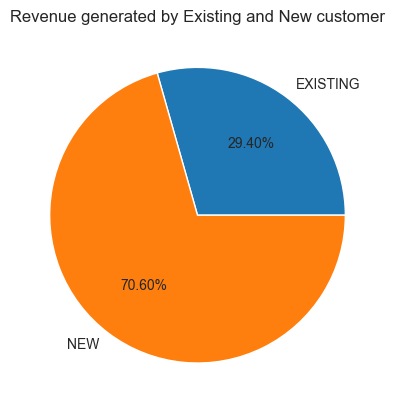

In [33]:
dfd = df1.groupby('customer_loyalty', as_index = False)['actual_revenue'].sum()
ax = plt.pie(data = dfd , labels = 'customer_loyalty'  , x = 'actual_revenue' , autopct = '%.2f%%')
plt.title('Revenue generated by Existing and New customer');

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\3707037723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compare = df1.groupby('customer_loyalty',as_index = False).sum()


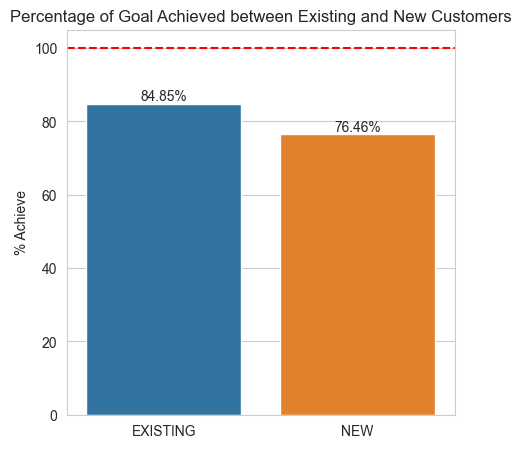

In [85]:
compare = df1.groupby('customer_loyalty',as_index = False).sum()
compare['pct_achieve'] = compare['actual_revenue'] / compare['goal']  * 100
fig = plt.figure(figsize = (5,5))
ax = sns.barplot(compare, x= 'customer_loyalty' , y= 'pct_achieve')
ax.set_title('Percentage of Goal Achieved between Existing and New Customers')
ax.set_xlabel(' ')
ax.set_ylabel('% Achieve')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = 100 ,color="red", linestyle="--");

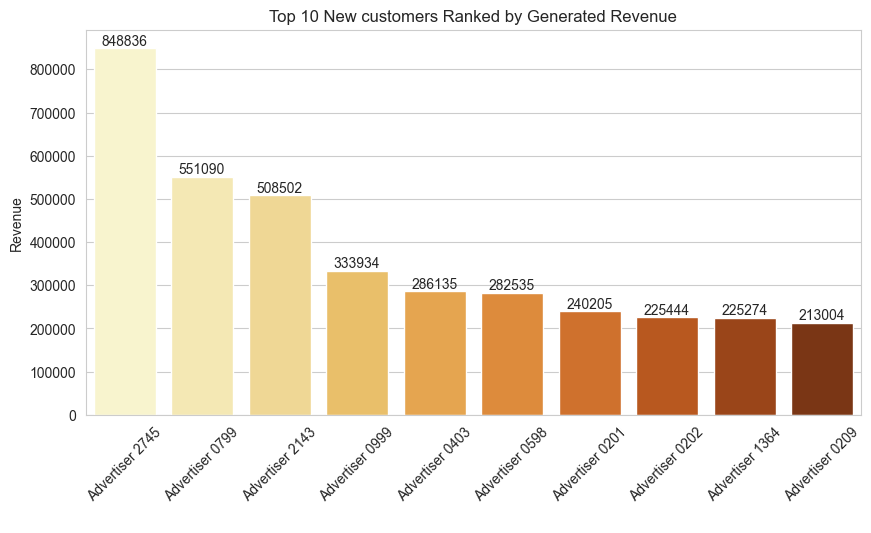

In [35]:
new_customer = df1[df1['customer_loyalty'] == 'NEW'].groupby('customer_name',as_index = False)['actual_revenue'].sum().sort_values('actual_revenue',ascending = False).head(10)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(new_customer, x = 'customer_name', y = 'actual_revenue' , palette = "YlOrBr")
ax.bar_label(ax.containers[0],label_type='edge')
ax.set_xlabel(' ')
ax.set_ylabel('Revenue')
ax.set_title('Top 10 New customers Ranked by Generated Revenue')
plt.xticks(rotation = 45);

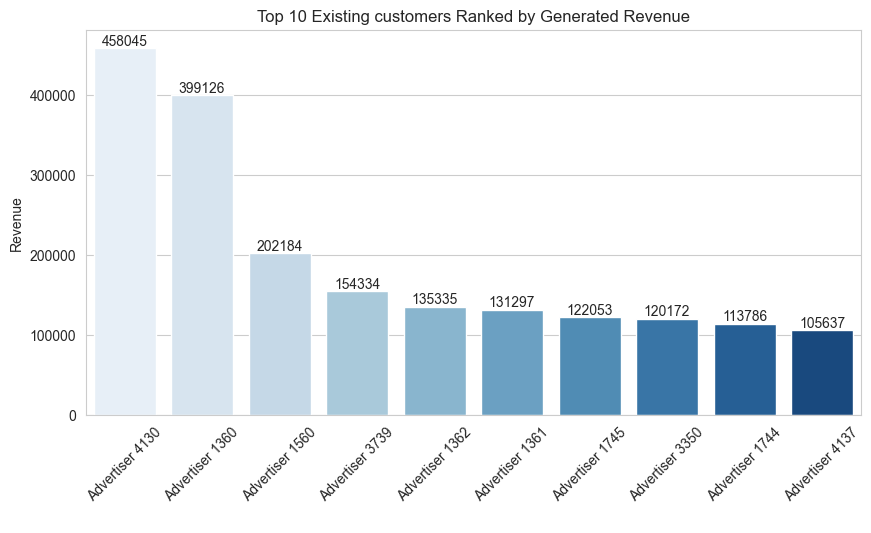

In [36]:
existing_customer = df1[df1['customer_loyalty'] == 'EXISTING'].groupby('customer_name',as_index = False)['actual_revenue'].sum().sort_values('actual_revenue',ascending = False).head(10)
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(existing_customer, x = 'customer_name', y = 'actual_revenue' , palette = "Blues")
ax.bar_label(ax.containers[0],label_type='edge')
ax.set_xlabel(' ')
ax.set_ylabel('Revenue')
ax.set_title('Top 10 Existing customers Ranked by Generated Revenue')
plt.xticks(rotation = 45);

In [37]:
df1.groupby('customer_name',as_index = False)['actual_revenue'].sum()

,customer_name,actual_revenue
0,Advertiser 0001,75640.8
1,Advertiser 0002,124554.0
2,Advertiser 0003,151176.0
3,Advertiser 0004,53158.8
4,Advertiser 0005,43470.0
...,...,...
4928,Advertiser 4929,1112.4
4929,Advertiser 4930,1556.4
4930,Advertiser 4931,4996.8
4931,Advertiser 4932,3702.0


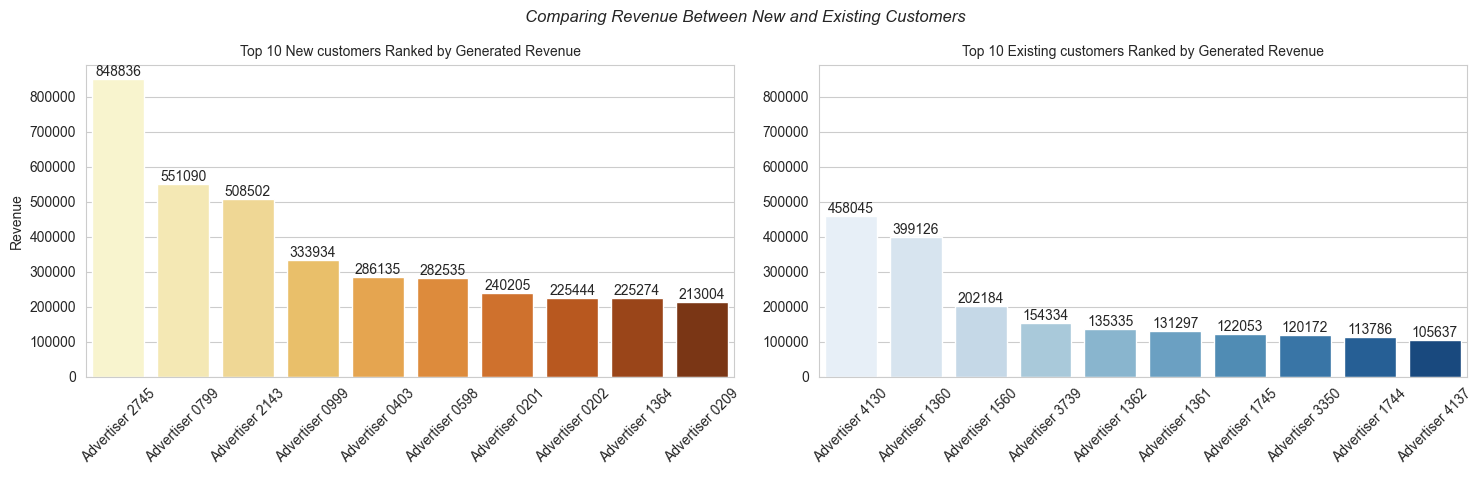

In [38]:
fig = plt.figure(figsize = (15,5))
plt.suptitle('Comparing Revenue Between New and Existing Customers',style = 'italic', font = 'Arial')

# First figure
ax = fig.add_subplot(1,2,1)
ax = sns.barplot(new_customer, x = 'customer_name', y = 'actual_revenue' , palette = "YlOrBr")
ax.bar_label(ax.containers[0],label_type='edge')
ax.set_xlabel(' ')
ax.set_ylabel('Revenue', fontdict = {'size': 10})
ax.set_title('Top 10 New customers Ranked by Generated Revenue' , fontdict = {'size': 10})
plt.xticks(rotation = 45)
# Second figure
ax1 = fig.add_subplot(1,2,2 , sharey = ax)
ax1 = sns.barplot(existing_customer, x = 'customer_name', y = 'actual_revenue' , palette = "Blues")
ax1.bar_label(ax1.containers[0],label_type='edge')
ax1.set_xlabel(' ')
ax1.set_ylabel('')
ax1.set_title('Top 10 Existing customers Ranked by Generated Revenue', fontdict = {'size': 10})
plt.xticks(rotation = 45);

plt.tight_layout()

In [39]:
df1.groupby('customer_tier').sum()

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\1402747772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('customer_tier').sum()


,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
customer_tier,,,,,,,
A,33278782.8,40335845.0,5090.0,2895.0,1916.0,1141.0,70028.25
B,10104921.6,12263079.4,2743.0,1517.0,1038.0,576.0,39545.88
C,4959564.0,8793495.7,2064.0,1145.0,756.0,385.0,30172.27


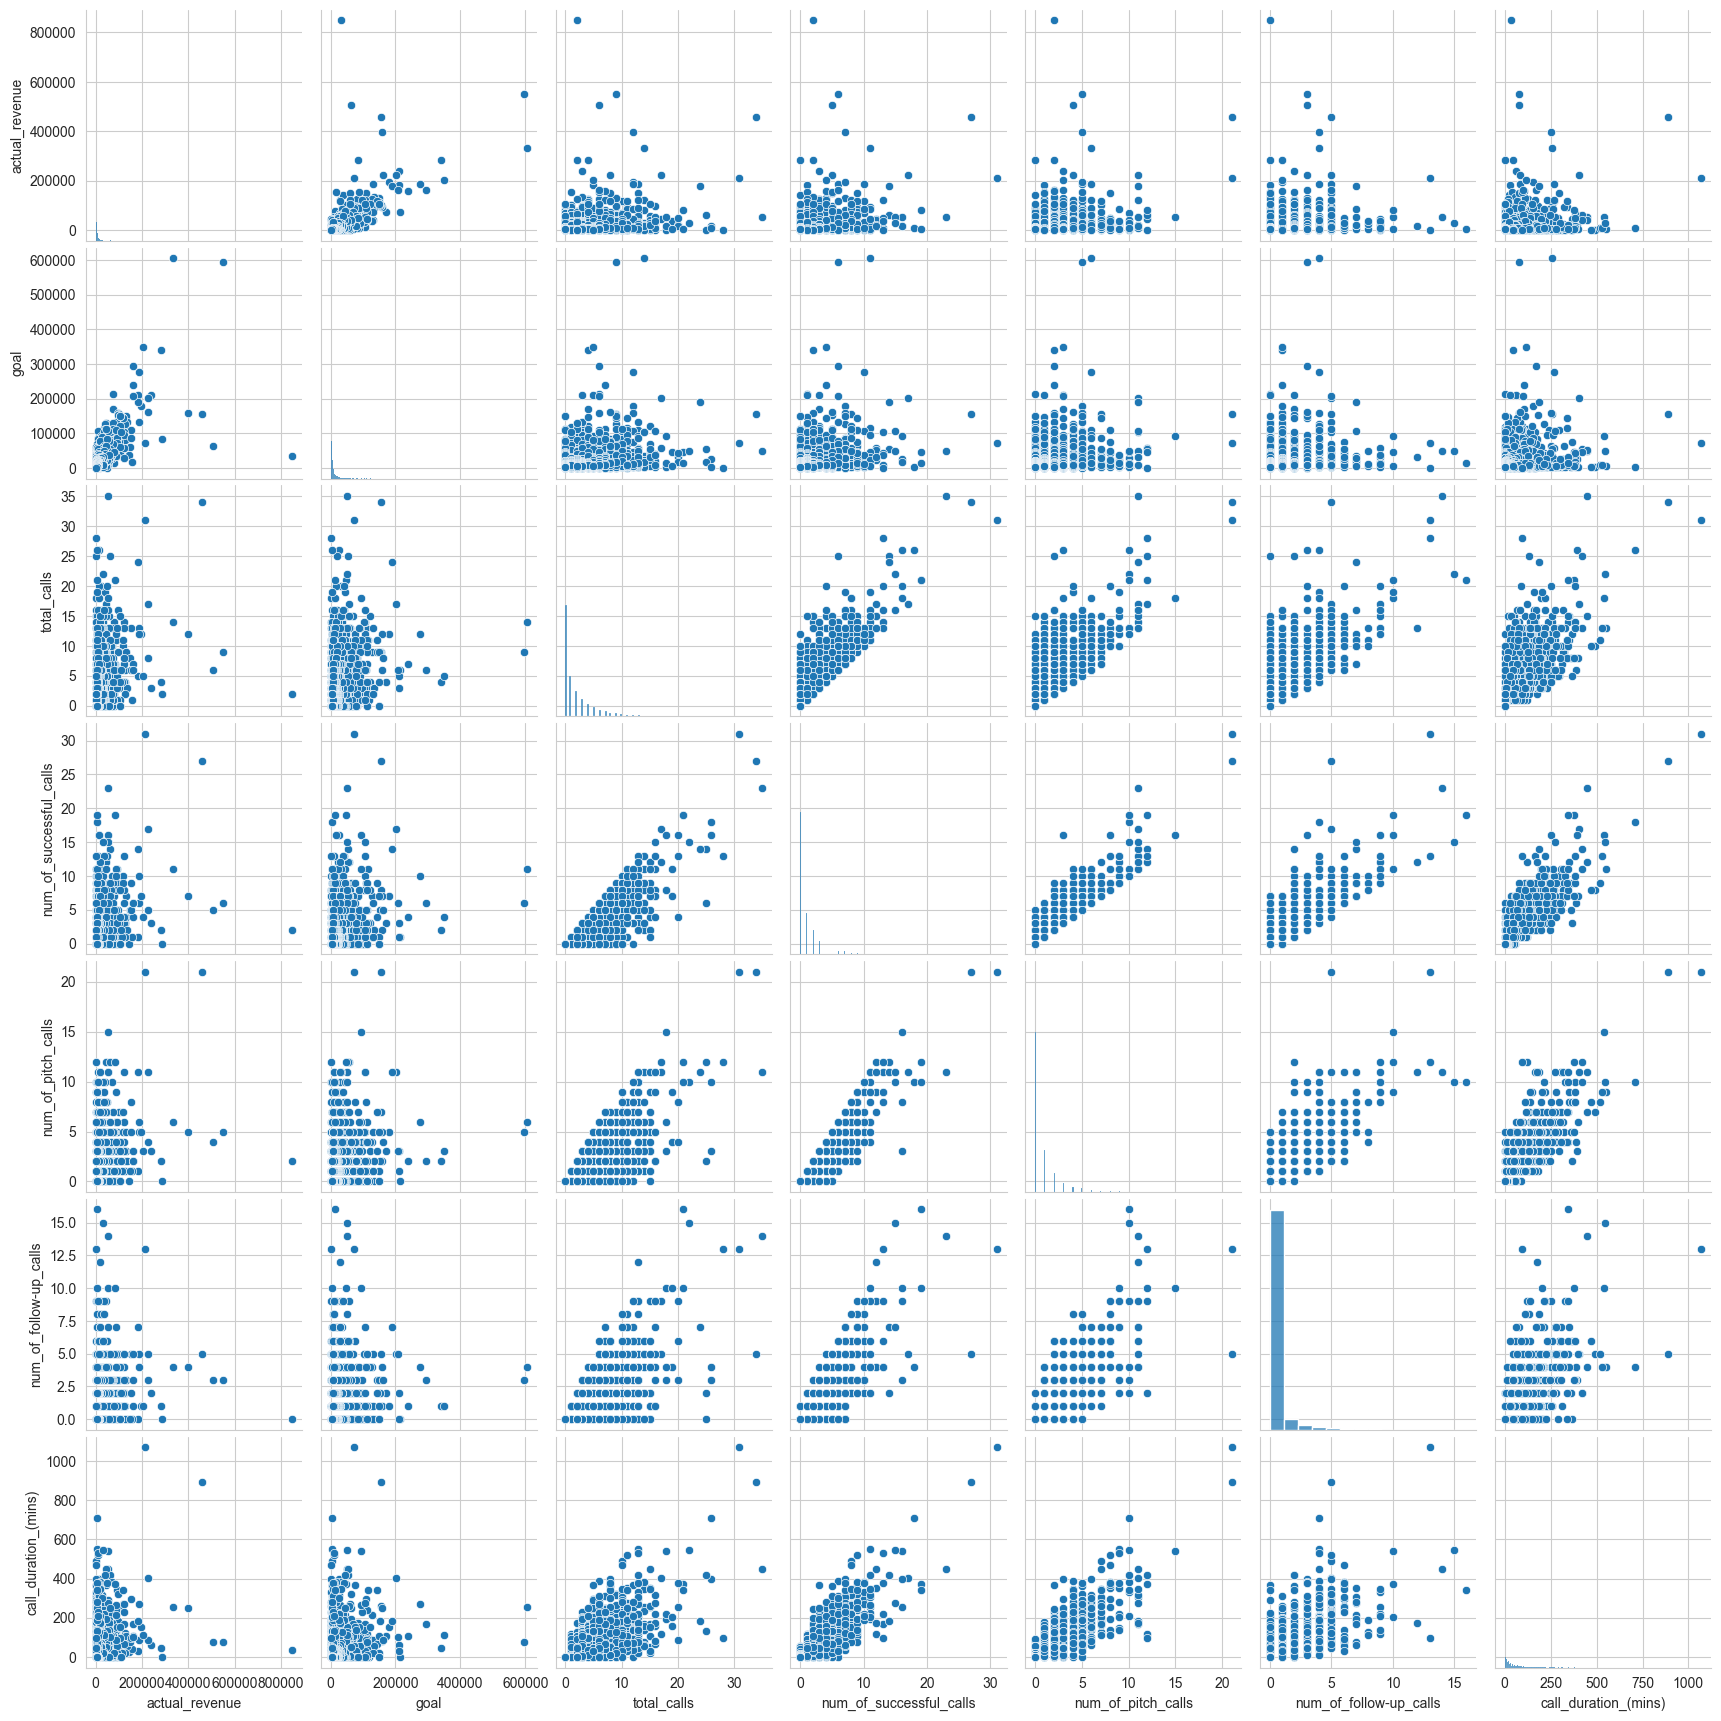

In [40]:
sns.pairplot(df1)

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\640535948.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr() , annot = True);


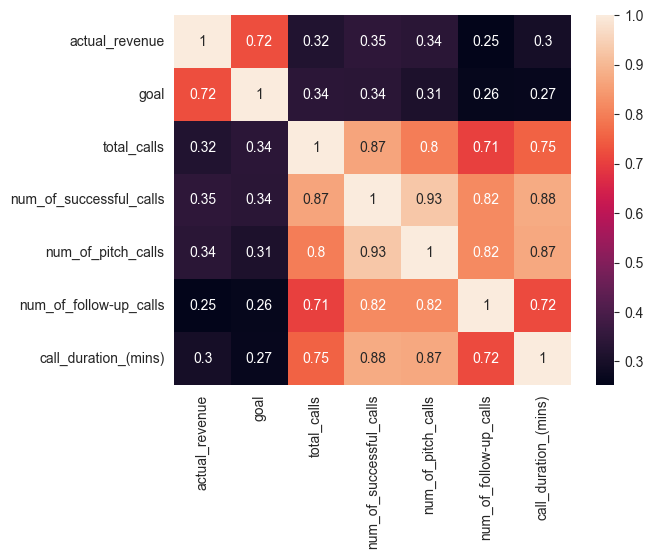

In [41]:
sns.heatmap(df1.corr() , annot = True);

In [42]:
df2 = pd.read_excel('D:\\DataSet\\testa.xlsx', sheet_name = 1)
df2

,Customer Name,Customer ID,Contact Type,Contact Date,Duration (in minutes),Activity ID,TD Agent
0,Advertiser 4934,0011200001FGvIjAAL,Email,2016-10-01,NaN,00T1200002KLYUO,Agent 04
1,Advertiser 4935,0011200001FI1dNAAT,Email,2016-10-01,NaN,00T1200002KLb9l,Agent 26
2,Advertiser 4936,0011200001FIAFpAAP,Email,2016-10-01,NaN,00T1200002KLYle,Agent 18
3,Advertiser 4937,0011200001GuJtjAAF,Email,2016-10-01,NaN,00T1200002KLYby,Agent 26
4,Advertiser 4166,001A000000qxBnLIAU,Email,2016-10-01,NaN,00T1200002KLGle,Agent 06
...,...,...,...,...,...,...,...
18485,Advertiser 2205,001A000001AR7R4IAL,Call,2016-12-09,NaN,00T1200002ONZwD,Agent 04
18486,Advertiser 2205,001A000001AR7R4IAL,Email,2016-12-09,NaN,00T1200002ONZyx,Agent 04
18487,Advertiser 2205,001A000001AR7R4IAL,Email,2016-12-09,NaN,00T1200002ONaV1,Agent 04
18488,Advertiser 4145,001A000001At2pgIAB,Call,2016-12-09,18.0,00T1200002ONZXS,Agent 30


In [43]:
# Change column names
df2.columns = [i.lower().replace(' ','_') for i in df2.columns]
df2.columns

Index(['customer_name', 'customer_id', 'contact_type', 'contact_date',
       'duration_(in_minutes)', 'activity_id', 'td_agent'],
      dtype='object')

<Axes: xlabel='duration_(in_minutes)', ylabel='Count'>

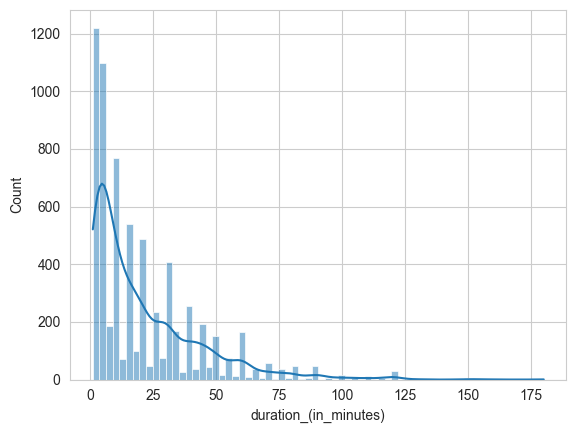

In [44]:
sns.histplot(df2[(df2['contact_type'] == 'Call') & (df2['duration_(in_minutes)'] > 0)], x = 'duration_(in_minutes)' , kde = True)

[Text(0, 0, '8503'), Text(0, 0, '9968'), Text(0, 0, '19')]

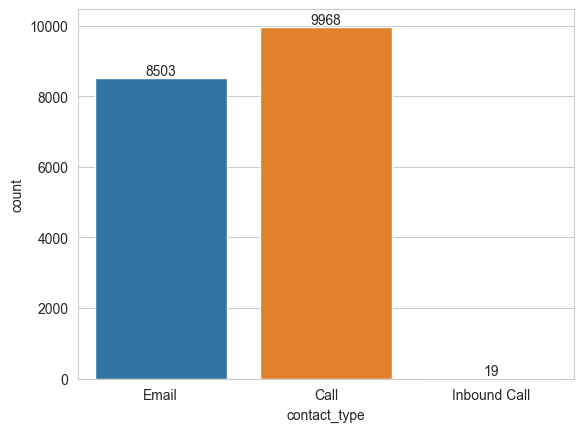

In [45]:
ax = sns.countplot(df2 , x = 'contact_type')
ax.bar_label(ax.containers[0],label_type='edge')

In [46]:
df1

,market,td_agent,customer_name,customer_id,vertical,customer_loyalty,customer_tier,opportunity_stage,pitched_to_customer,purchased,actual_revenue,goal,total_calls,num_of_successful_calls,num_of_pitch_calls,num_of_follow-up_calls,call_duration_(mins)
0,Ctry 1,Agent 05,Advertiser 0001,0011200001Gu8I5AAJ,Vertical 09,NEW,A,Engaged Decision Maker,Yes,Yes,75640.8,171438.3,4.0,3.0,3.0,2.0,107.00
1,Ctry 1,Agent 05,Advertiser 0002,001A000000wJ2WHIA0,Vertical 07,NEW,A,Engaged Decision Maker,Yes,Yes,124554.0,122127.5,4.0,3.0,3.0,1.0,93.00
2,Ctry 1,Agent 05,Advertiser 0003,0011200001DQtHpAAL,Vertical 03,NEW,A,Engaged Decision Maker,Yes,No,151176.0,109026.5,13.0,9.0,8.0,5.0,295.00
3,Ctry 1,Agent 05,Advertiser 0004,0011200001HibmQAAR,Vertical 08,NEW,A,Engaged Decision Maker,Yes,Yes,53158.8,96261.0,7.0,3.0,3.0,2.0,100.00
4,Ctry 1,Agent 05,Advertiser 0005,0011200001I1sGFAAZ,Vertical 15,NEW,A,Attempted Contact – Ongoing,No,No,43470.0,130697.6,2.0,1.0,1.0,1.0,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,Ctry 7,Agent 28,Advertiser 4929,0011200001FFYh1AAH,Vertical 14,NEW,C,New,No,No,1112.4,3848.9,0.0,0.0,0.0,0.0,0.00
4929,Ctry 7,Agent 28,Advertiser 4930,0011200001GuK13AAF,Vertical 04,EXISTING,C,New,No,No,1556.4,3286.8,0.0,0.0,0.0,0.0,0.00
4930,Ctry 7,Agent 28,Advertiser 4931,0011200001I1nsgAAB,Vertical 04,NEW,C,New,No,No,4996.8,3786.2,0.0,0.0,0.0,0.0,0.00
4931,Ctry 7,Agent 28,Advertiser 4932,0011200001DRfmLAAT,Vertical 14,NEW,C,New,No,No,3702.0,2981.0,0.0,0.0,0.0,0.0,0.00


In [47]:
df2

,customer_name,customer_id,contact_type,contact_date,duration_(in_minutes),activity_id,td_agent
0,Advertiser 4934,0011200001FGvIjAAL,Email,2016-10-01,NaN,00T1200002KLYUO,Agent 04
1,Advertiser 4935,0011200001FI1dNAAT,Email,2016-10-01,NaN,00T1200002KLb9l,Agent 26
2,Advertiser 4936,0011200001FIAFpAAP,Email,2016-10-01,NaN,00T1200002KLYle,Agent 18
3,Advertiser 4937,0011200001GuJtjAAF,Email,2016-10-01,NaN,00T1200002KLYby,Agent 26
4,Advertiser 4166,001A000000qxBnLIAU,Email,2016-10-01,NaN,00T1200002KLGle,Agent 06
...,...,...,...,...,...,...,...
18485,Advertiser 2205,001A000001AR7R4IAL,Call,2016-12-09,NaN,00T1200002ONZwD,Agent 04
18486,Advertiser 2205,001A000001AR7R4IAL,Email,2016-12-09,NaN,00T1200002ONZyx,Agent 04
18487,Advertiser 2205,001A000001AR7R4IAL,Email,2016-12-09,NaN,00T1200002ONaV1,Agent 04
18488,Advertiser 4145,001A000001At2pgIAB,Call,2016-12-09,18.0,00T1200002ONZXS,Agent 30


In [48]:
#Extract weekday
time = df2.groupby('contact_date',as_index = False)['duration_(in_minutes)'].sum()
time['contact_date'] = time.contact_date.astype(str)
time['date'] = pd.to_datetime(time['contact_date'])
time['date'] = time['date'].dt.weekday
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time['weekday_name'] = time['date'].map(lambda day: weekday_names[day])

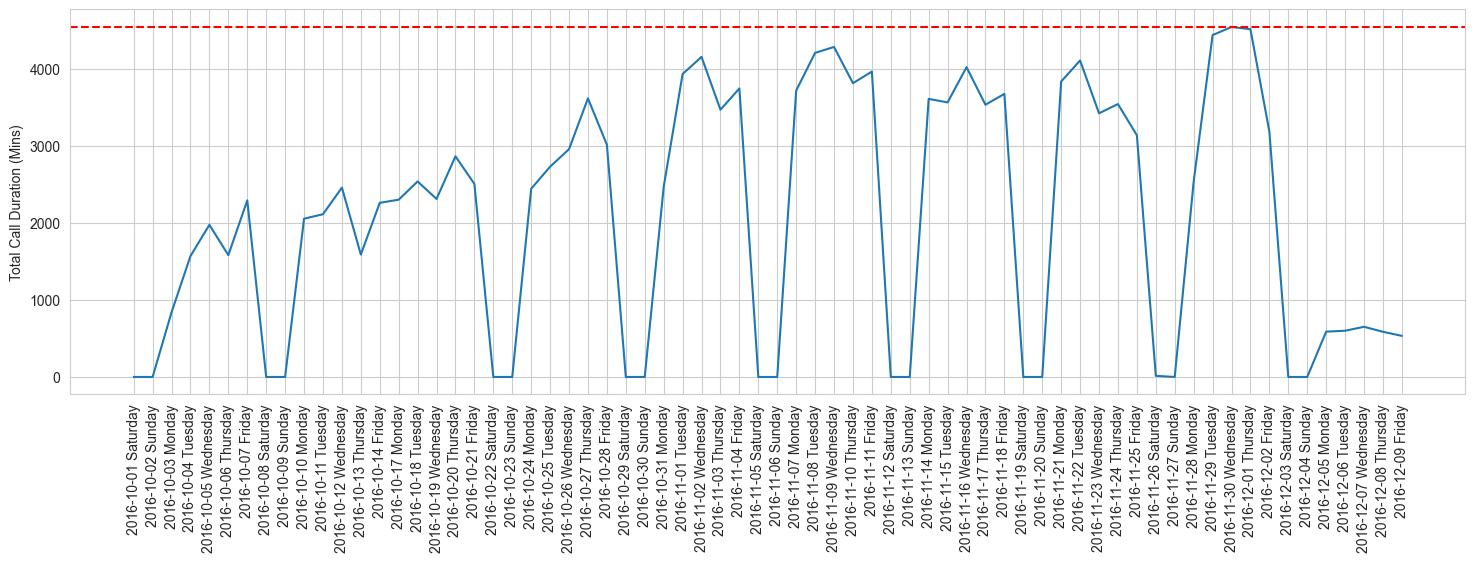

In [49]:
time['full_date'] = time['contact_date'] + ' ' + time['weekday_name']
fig = plt.figure(figsize = (18,5))
ax = sns.lineplot(time, x = 'full_date', y = 'duration_(in_minutes)')
ax.set_ylabel('Total Call Duration (Mins)')
ax.set_xlabel(' ')
plt.axhline(y  = np.max(time['duration_(in_minutes)']) ,color="red", linestyle="--")
plt.xticks(rotation = 90);

In [50]:
weekday = time.groupby('weekday_name',as_index = False)['duration_(in_minutes)'].sum().sort_values('duration_(in_minutes)')
weekday

,weekday_name,duration_(in_minutes)
3,Sunday,0.00
2,Saturday,15.00
1,Monday,24419.50
0,Friday,28344.37
4,Thursday,29144.90
5,Tuesday,29833.15
6,Wednesday,30814.48


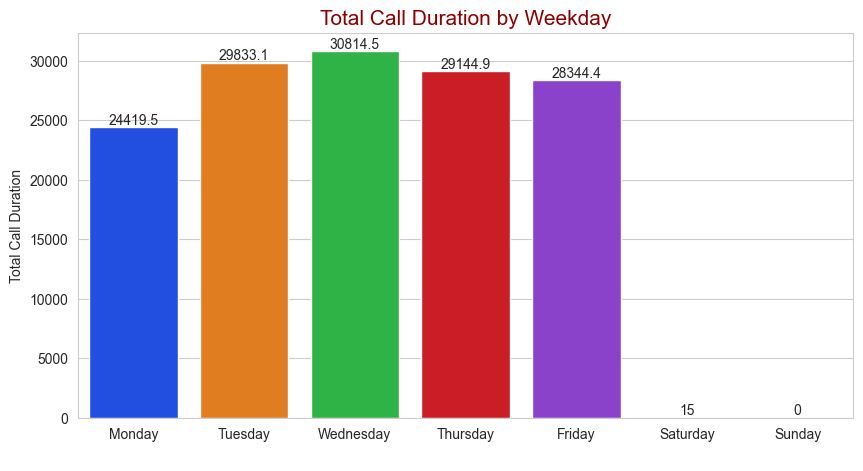

In [51]:
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(weekday, x = 'weekday_name' , y = 'duration_(in_minutes)' ,
                 order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                palette = sns.color_palette("bright") )
ax.bar_label(ax.containers[0],label_type='edge')
ax.set_ylabel('Total Call Duration')
ax.set_xlabel(' ')
ax.set_title('Total Call Duration by Weekday' , fontdict = {'size': 15 , 'color': 'darkred'});

In [52]:
email = df2[df2['contact_type'] == 'Email'].groupby('td_agent', as_index = False).agg(email = ('customer_name' , 'count'))
call = df2[df2['contact_type'] == 'Call'].groupby('td_agent', as_index = False).agg(call = ('customer_name' , 'count'))
merge = email.merge(call , how = 'left' , on = 'td_agent')
merge['total_contact'] = merge['email'] + merge['call']
merge = merge.merge(dfx , how = 'left' , on = 'td_agent')
# merge['pct_achieve'] = dfx['pct_achieve']
merge = merge.merge(new_metric, how = 'left' , on = 'td_agent')
merge = merge.drop(columns = ['actual_revenue_x','goal_x','pct_achieve_x'])
merge.sort_values('actual_revenue_y',ascending = False)

,td_agent,email,call,total_contact,actual_revenue_y,goal_y,pct_achieve_y,call_duration_(mins),new_score
19,Agent 20,296,296,592,3790876.8,4909598.1,77.213587,31.700000,2.435760
16,Agent 17,119,301,420,3313784.4,3709376.0,89.335360,39.291457,2.273659
7,Agent 08,319,540,859,2934418.8,3391326.4,86.527171,37.415000,2.312633
28,Agent 29,190,164,354,2803744.8,2938383.8,95.417923,37.532663,2.542264
21,Agent 22,260,411,671,2437262.4,3721256.0,65.495693,23.688525,2.764870
4,Agent 05,229,304,533,2342571.6,2847186.1,82.276729,31.280000,2.630330
9,Agent 10,289,380,669,2304283.2,3008777.2,76.585372,15.251256,5.021578
20,Agent 21,819,773,1592,2222443.2,3233417.0,68.733578,20.410000,3.367642
15,Agent 16,109,165,274,2198641.2,2389252.8,92.022125,12.075472,7.620582
29,Agent 30,288,350,638,2129463.6,2473728.4,86.083161,31.819095,2.705393


In [53]:
#Miss call
time2 = df2[(df2['contact_type'] == 'Call' )& (df2['duration_(in_minutes)'].isnull())].groupby('contact_date',as_index = False)['customer_name'].count()
time2['contact_date'] = time2.contact_date.astype(str)
time2['date'] = pd.to_datetime(time2['contact_date'])
time2['date'] = time2['date'].dt.weekday
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time2['weekday_name'] = time2['date'].map(lambda day: weekday_names[day])
time2['full_date'] = time2['contact_date'] + ' ' + time2['weekday_name']

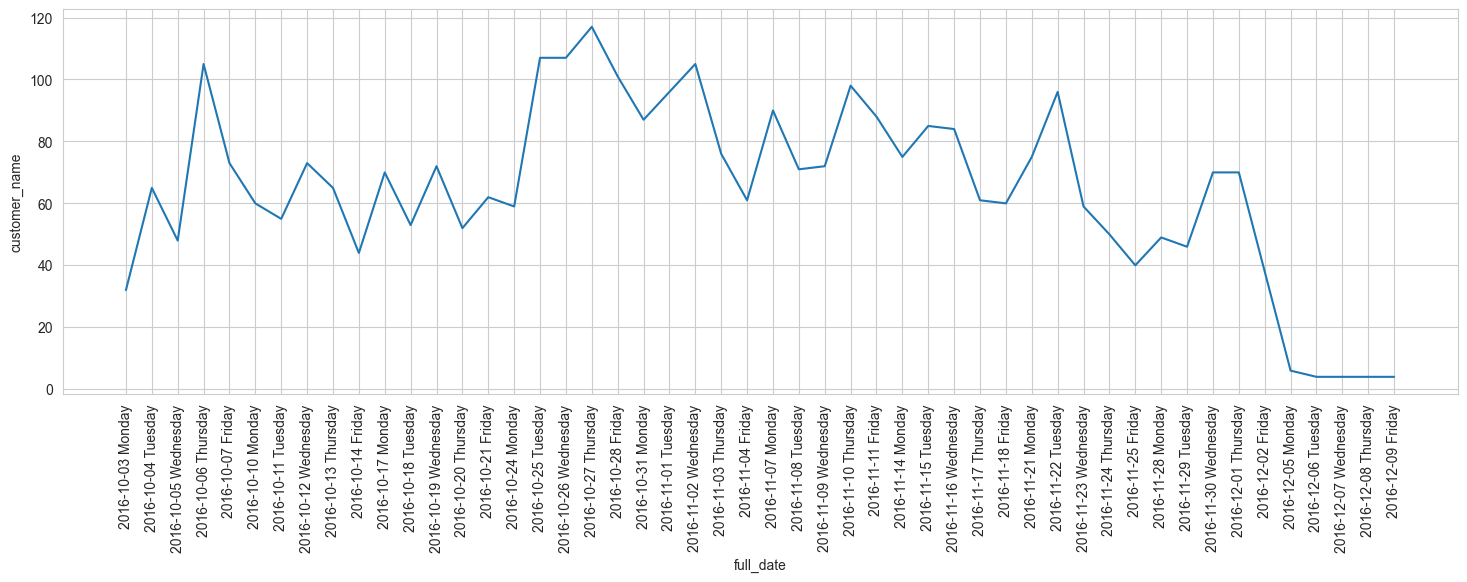

In [54]:
fig = plt.figure(figsize = (18,5))
ax = sns.lineplot(time2, x = 'full_date' , y = 'customer_name')
plt.xticks(rotation = 90);

Text(0.5, 0, ' ')

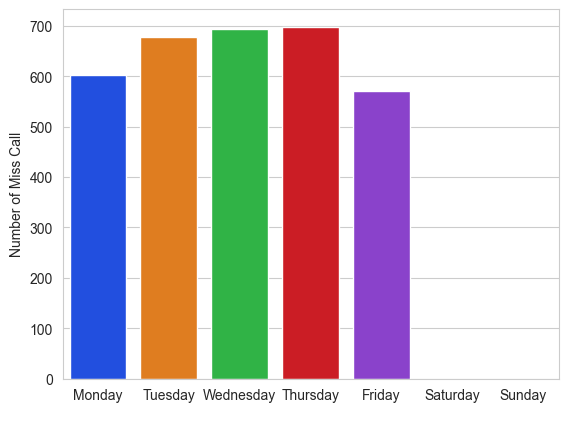

In [55]:
miss = time2.groupby('weekday_name',as_index = False)['customer_name'].sum()
ax = sns.barplot(miss, x = 'weekday_name', y = 'customer_name',order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                palette = sns.color_palette("bright"))
ax.set_ylabel('Number of Miss Call')
ax.set_xlabel(' ')

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\612762441.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfa = dfa.groupby('td_agent',as_index = False).sum()


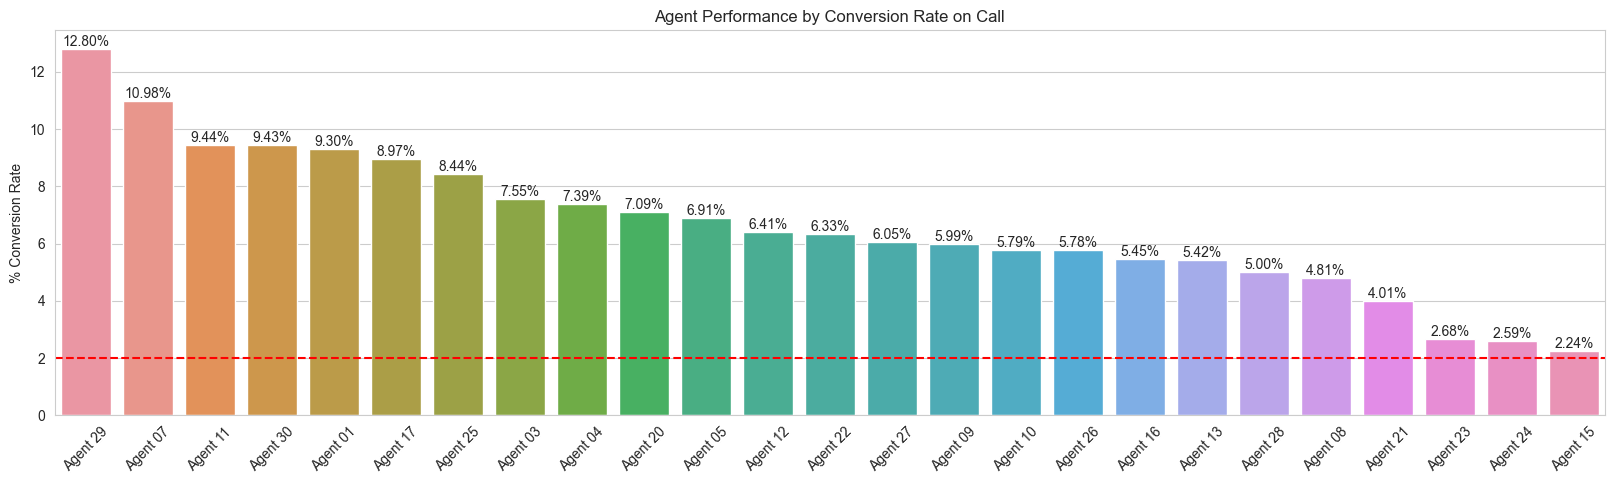

In [65]:
# Calculate Conversion Rate in each agent

dfa = df1.copy()
dfa = pd.get_dummies(dfa, columns = ['purchased'] , drop_first = True)
dfa = dfa.groupby('td_agent',as_index = False).sum()
dfa = dfa.merge(merge , how = 'left', on = 'td_agent')
dfa = dfa[['td_agent','email','call','total_contact','actual_revenue_y','pct_achieve_y','purchased_Yes']]
dfa['conversion_rate'] = dfa['purchased_Yes'] / dfa['total_contact'] *100
dfa['conversion_rate(call)'] = dfa['purchased_Yes'] / dfa['call'] *100
dfa = dfa.sort_values('conversion_rate',ascending = False)

fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfa.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Conversion Rate on Call')
plt.axhline(y  = 2 ,color="red", linestyle="--" )
# plt.text(x = 18 , y = np.mean(dfs['pct_successful_calls']) + 2 ,s = 'Average Percentage of Succesful Calls {}%'.format(int(np.mean(dfs['pct_successful_calls']))),
#          fontdict = {'size' : 9 , 'color' : 'navy'})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%');

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\3055232317.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfa = dfa[dfa['opportunity_stage'] == 'Engaged Decision Maker'].groupby('td_agent',as_index = False).sum()


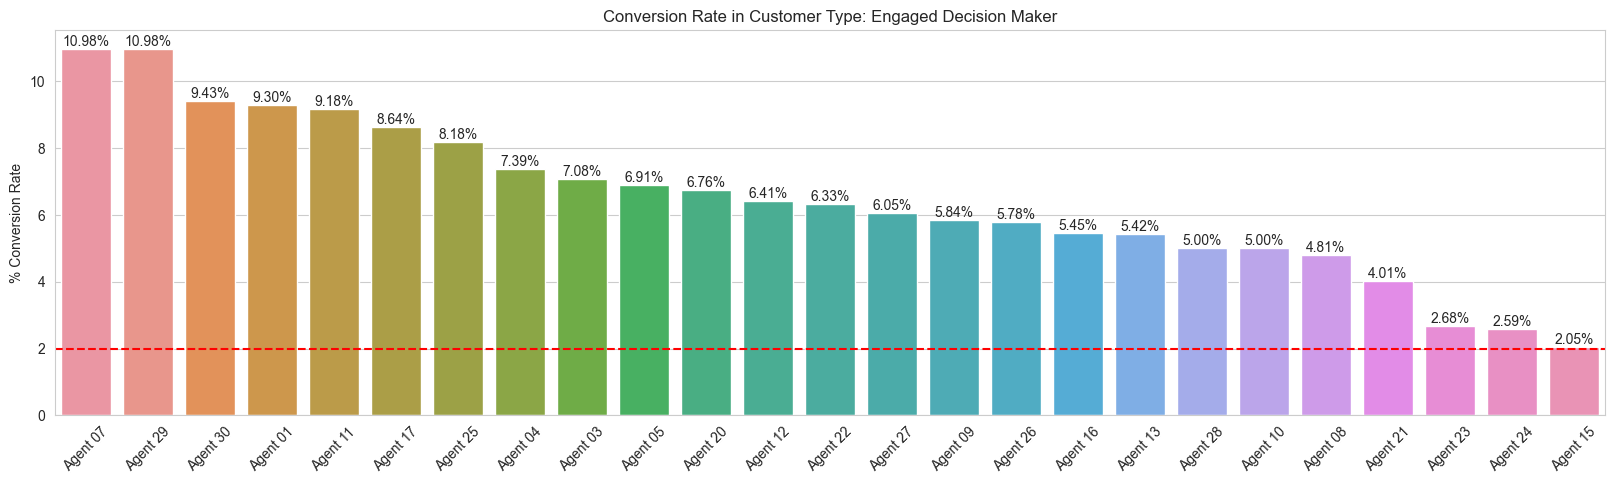

In [70]:
dfa = df1.copy()
dfa = pd.get_dummies(dfa, columns = ['purchased'] , drop_first = True)
dfa = dfa[dfa['opportunity_stage'] == 'Engaged Decision Maker'].groupby('td_agent',as_index = False).sum()
dfa = dfa.merge(merge , how = 'left', on = 'td_agent')
dfa = dfa[['td_agent','email','call','total_contact','actual_revenue_y','pct_achieve_y','purchased_Yes']]
dfa['conversion_rate'] = dfa['purchased_Yes'] / dfa['total_contact'] *100
dfa['conversion_rate(call)'] = dfa['purchased_Yes'] / dfa['call'] *100
dfa = dfa.sort_values('conversion_rate',ascending = False)

fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfa.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Conversion Rate in Customer Type: Engaged Decision Maker')
plt.axhline(y  = 2 ,color="red", linestyle="--" )
# plt.text(x = 18 , y = np.mean(dfs['pct_successful_calls']) + 2 ,s = 'Average Percentage of Succesful Calls {}%'.format(int(np.mean(dfs['pct_successful_calls']))),
#          fontdict = {'size' : 9 , 'color' : 'navy'})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%');

C:\Users\kendo\AppData\Local\Temp\ipykernel_4020\389307661.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfa = dfa.groupby('td_agent',as_index = False).sum()


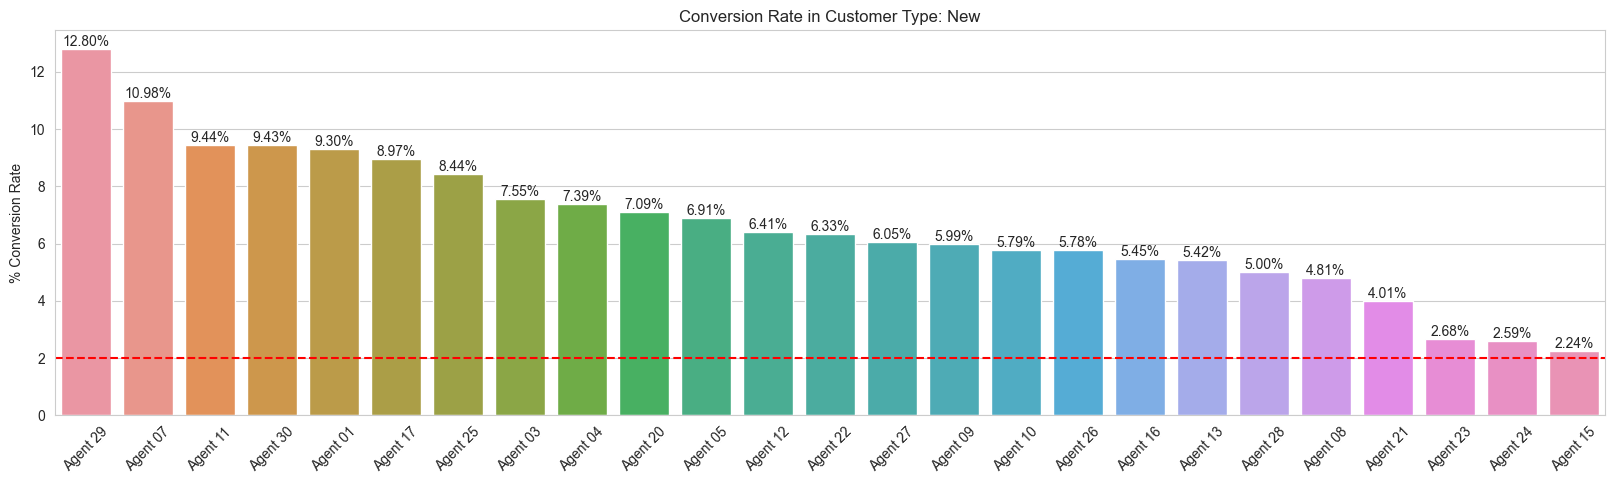

In [94]:
dfa = df1.copy()
dfa = pd.get_dummies(dfa, columns = ['purchased'] , drop_first = True)
dfa = dfa.groupby('td_agent',as_index = False).sum()
dfa = dfa.merge(merge , how = 'left', on = 'td_agent')
dfa = dfa[['td_agent','email','call','total_contact','actual_revenue_y','pct_achieve_y','purchased_Yes']]
dfa['conversion_rate'] = dfa['purchased_Yes'] / dfa['total_contact'] *100
dfa['conversion_rate(call)'] = dfa['purchased_Yes'] / dfa['call'] *100
dfa = dfa.sort_values('conversion_rate',ascending = False)

fig = plt.figure(figsize= (20,5))
ax = sns.barplot(dfa.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Conversion Rate in Customer Type: New')
plt.axhline(y  = 2 ,color="red", linestyle="--" )
# plt.text(x = 18 , y = np.mean(dfs['pct_successful_calls']) + 2 ,s = 'Average Percentage of Succesful Calls {}%'.format(int(np.mean(dfs['pct_successful_calls']))),
#          fontdict = {'size' : 9 , 'color' : 'navy'})
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%');

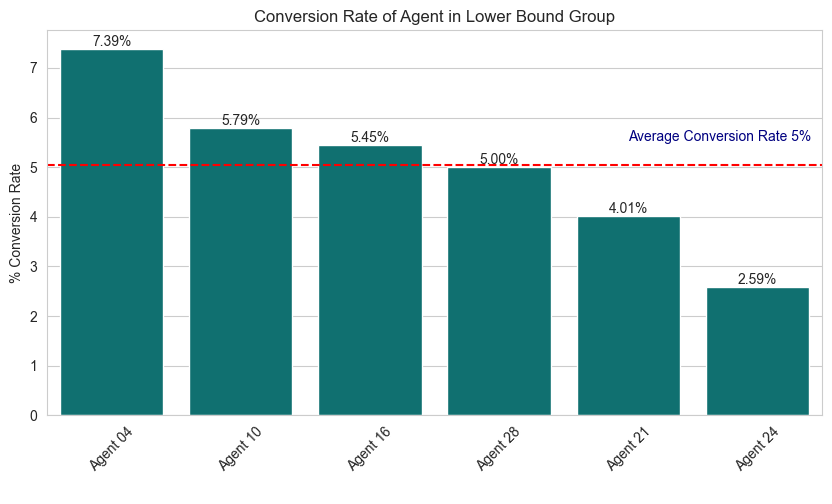

In [112]:
lower_group = dfa[dfa['td_agent'].isin(lower)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(lower_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'teal')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Conversion Rate of Agent in Lower Bound Group')
plt.axhline(y  = np.mean(lower_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  4 ,y = np.mean(lower_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(lower_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.xticks(rotation=45);

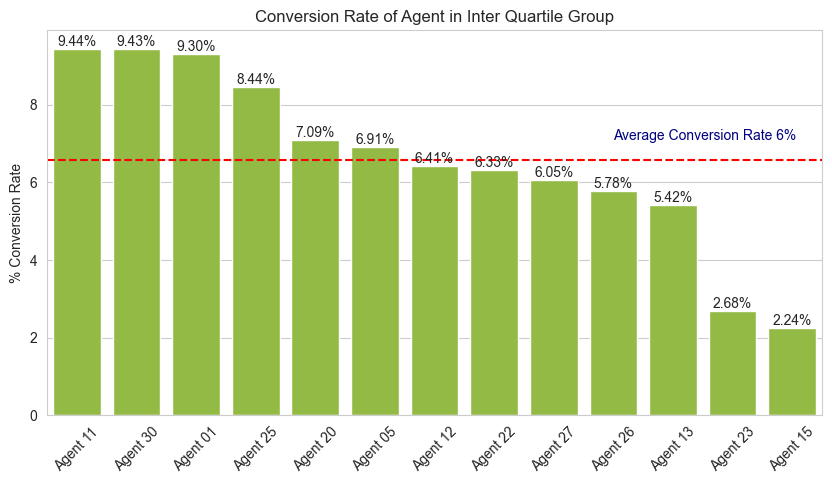

In [113]:
IQR_group = dfa[~dfa['td_agent'].isin(between)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(IQR_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'yellowgreen')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Conversion Rate of Agent in Inter Quartile Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(IQR_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  9 ,y = np.mean(IQR_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(IQR_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
plt.xticks(rotation=45);

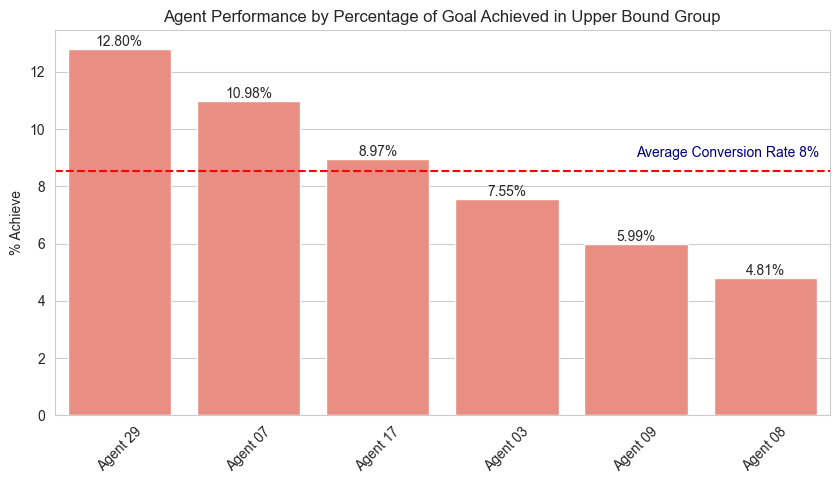

In [111]:
upper_group = dfa[dfa['td_agent'].isin(upper)]
fig = plt.figure(figsize= (10,5))
ax = sns.barplot(upper_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'salmon')
ax.set_ylabel('% Achieve')
ax.set_xlabel(' ')
ax.set_title('Agent Performance by Percentage of Goal Achieved in Upper Bound Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(upper_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  4 ,y = np.mean(upper_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(upper_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
plt.xticks(rotation=45);

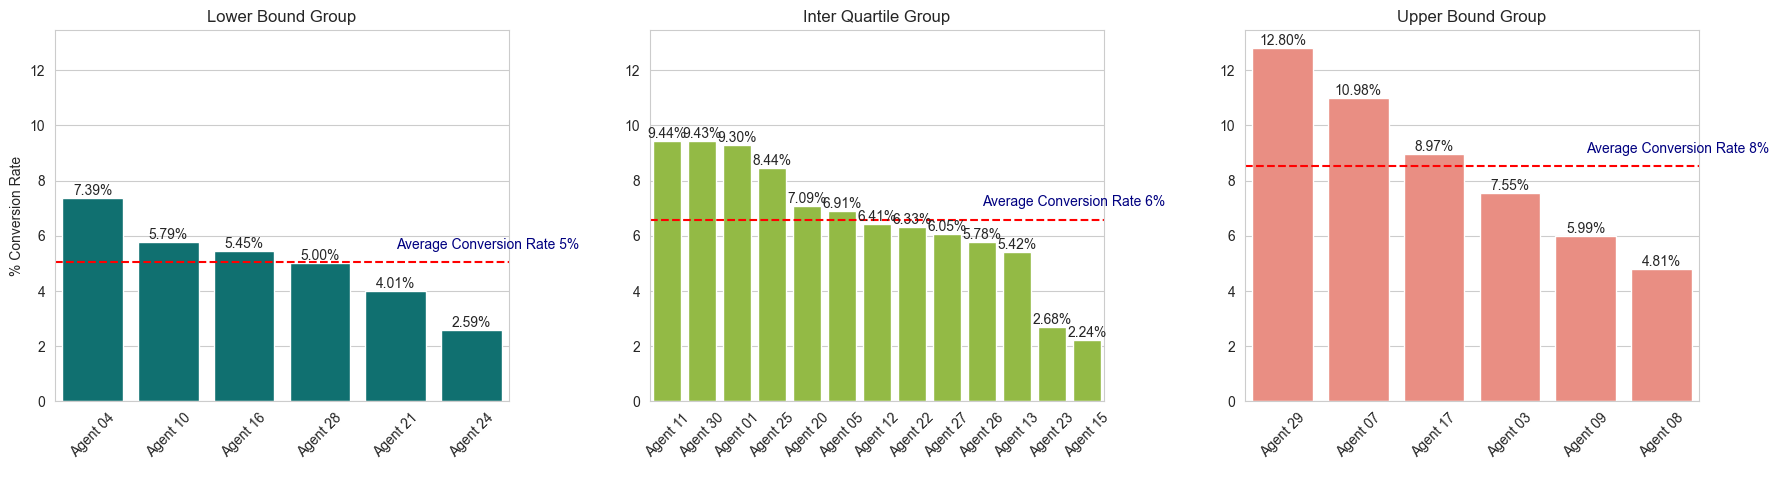

In [117]:
fig = plt.figure(figsize = (18,5))
ax = fig.add_subplot(1,3,1)
ax = sns.barplot(lower_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'teal')
ax.set_ylabel('% Conversion Rate')
ax.set_xlabel(' ')
ax.set_title('Lower Bound Group')
ax.bar_label(ax.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(lower_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  4 ,y = np.mean(lower_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(lower_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
plt.xticks(rotation=45)

ax1 = fig.add_subplot(1,3,2 , sharey = ax)
ax1 = sns.barplot(IQR_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'yellowgreen')
ax1.set_ylabel(' ')
ax1.set_xlabel(' ')
ax1.set_title('Inter Quartile Group')
ax1.bar_label(ax1.containers[0],label_type='edge' , fmt='%.2f%%')
plt.axhline(y  = np.mean(IQR_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  9 ,y = np.mean(IQR_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(IQR_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
plt.xticks(rotation=45);

ax2 = fig.add_subplot(1,3,3, sharey = ax)
ax2 = sns.barplot(upper_group.sort_values('conversion_rate(call)' , ascending = False) , x = 'td_agent' , y= 'conversion_rate(call)' , color = 'salmon')
ax2.set_ylabel(' ')
ax2.set_xlabel(' ')
ax2.set_title('Upper Bound Group')
ax2.bar_label(ax2.containers[0],label_type='edge' , fmt='%.2f%%')
plt.xticks(rotation=45)
plt.axhline(y  = np.mean(upper_group['conversion_rate(call)']) ,color="red", linestyle="--")
plt.text(x =  4 ,y = np.mean(upper_group['conversion_rate(call)'])+0.5 ,s = 'Average Conversion Rate {}%'.format(int(np.mean(upper_group['conversion_rate(call)']))) , fontdict = {'size' : 10 , 'color' : 'navy'})
plt.tight_layout();

# Hypothesis Testing

In [118]:
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, levene, kruskal
from statsmodels.stats.multicomp import MultiComparison
!pip install scikit-posthocs
import scikit_posthocs as sp


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
dfa

,td_agent,email,call,total_contact,actual_revenue_y,pct_achieve_y,purchased_Yes,conversion_rate,conversion_rate(call)
13,Agent 17,119,301,420,3313784.4,89.335360,27,6.428571,8.970100
23,Agent 29,190,164,354,2803744.8,95.417923,21,5.932203,12.804878
19,Agent 25,202,379,581,1698388.8,61.929428,32,5.507745,8.443272
24,Agent 30,288,350,638,2129463.6,86.083161,33,5.172414,9.428571
4,Agent 07,289,255,544,586617.6,65.735778,28,5.147059,10.980392
0,Agent 01,246,258,504,1722312.0,76.084676,24,4.761905,9.302326
1,Agent 03,265,424,689,888606.0,76.483530,32,4.644412,7.547170
6,Agent 09,302,651,953,1469053.2,88.262350,39,4.092340,5.990783
8,Agent 11,534,392,926,1769504.4,90.903666,37,3.995680,9.438776
9,Agent 12,255,421,676,1662906.0,78.218372,27,3.994083,6.413302


In [120]:
upper

['Agent 08', 'Agent 29', 'Agent 03', 'Agent 09', 'Agent 17', 'Agent 07']

In [121]:
lower

['Agent 24', 'Agent 16', 'Agent 10', 'Agent 28', 'Agent 04', 'Agent 21']

In [132]:
def convert(x):
    if x in upper:
        return 'Upper'
    elif x in lower:
        return 'Lower'
    else:
        return 'Inter'

In [133]:
dfa['td_agent'] = dfa['td_agent'].apply(convert)

In [138]:
dfa = dfa[['td_agent','conversion_rate']]
dfa

,td_agent,conversion_rate
13,Upper,6.428571
23,Upper,5.932203
19,Inter,5.507745
24,Inter,5.172414
4,Upper,5.147059
0,Inter,4.761905
1,Upper,4.644412
6,Upper,4.092340
8,Inter,3.995680
9,Inter,3.994083


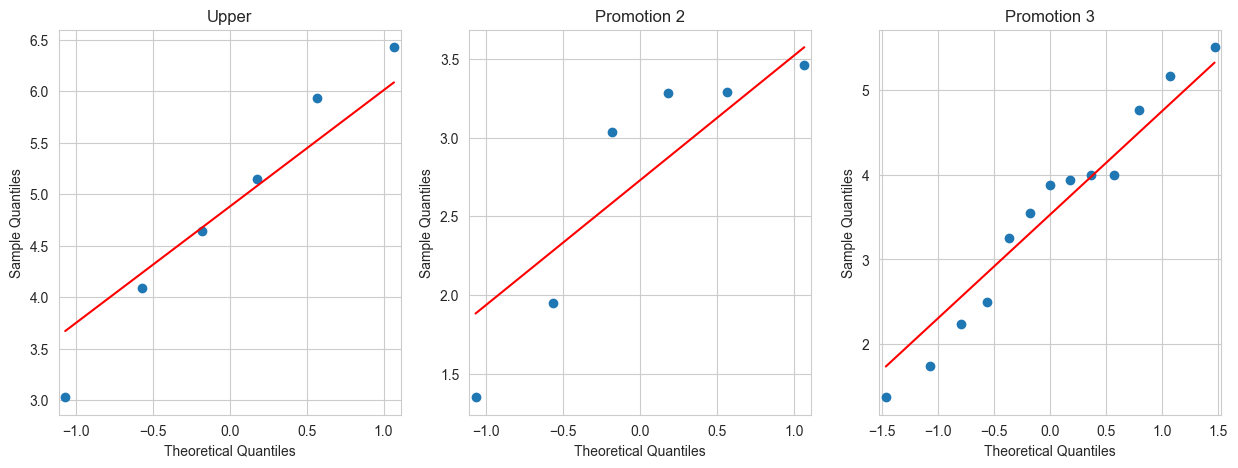

In [139]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

qqplot(dfa[dfa["td_agent"] == 'Upper']["conversion_rate"], line = "s", ax = axs[0])
qqplot(dfa[dfa["td_agent"] == 'Lower']["conversion_rate"], line = "s", ax = axs[1])
qqplot(dfa[dfa["td_agent"] == 'Inter']["conversion_rate"], line = "s", ax = axs[2])

axs[0].set_title("Upper")
axs[1].set_title("Promotion 2")
axs[2].set_title("Promotion 3")

plt.show()

In [142]:
promotions = dfa["td_agent"].unique()

for promotion in promotions:
    
    p_value = shapiro(dfa[dfa["td_agent"] == promotion]["conversion_rate"])[1]
    
    print("Promotion : {} \t P-value : {} \t Reject H_0: {}".format(promotion, p_value, p_value<0.05))

Promotion : Upper 	 P-value : 0.9630883932113647 	 Reject H_0: False
Promotion : Inter 	 P-value : 0.720156192779541 	 Reject H_0: False
Promotion : Lower 	 P-value : 0.08814506977796555 	 Reject H_0: False


In [144]:
test_stat, p_value = kruskal(
                            dfa[dfa["td_agent"] == 'Upper']["conversion_rate"], 
                            dfa[dfa["td_agent"] == 'Lower']["conversion_rate"], 
                            dfa[dfa["td_agent"] == 'Inter']["conversion_rate"]
)

print("P-value : {} \t H_0 reject : {}".format(p_value, p_value<0.05))

P-value : 0.027859208638303972 	 H_0 reject : True


In [147]:
upper_group = dfa[dfa["td_agent"] == 'Upper']["conversion_rate"]
inter_group = dfa[dfa["td_agent"] == 'Inter']["conversion_rate"]
lower_group = dfa[dfa["td_agent"] == 'Lower']["conversion_rate"]


data_group = [upper_group, inter_group, lower_group]

sp.posthoc_dunn(data_group, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.247426,0.022947
2,0.247426,1.000000,0.499486
3,0.022947,0.499486,1.000000
